# Software developer salary prediction
## 1. Đặt vấn đề: 
- Công nghệ số đang phát triển nhưng nguồn nhân lực có trình độ còn hạn chế. Do đó, nhà tuyển dụng cần đưa ra mức lương phù hợp để thu hút các ứng cử viên. Bên cạnh đó, ứng cử viên cũng có thể biết được điều kiện cần để có được mức lương mong muốn. 
- Giải pháp: Xây dựng mô hình dự đoán lương của nhà phát triển phần mềm dựa trên các tiêu chí ..

## Tổng quan dự án
Dự án bao gồm các bước sau,

- **Exploratory Data Analysis**: Explore the various features, their distributions using Histograms and Box-plots
- **Pre-processing and Data Cleaning**: Normalisation, filling missing values, encoding categorical values
- **Feature Selection**: Study the correlation with response variable (Listing Price) and determine which features are most useful in predicting the price.
- **Model Fitting and Selection**: Training different models, tuning hyper-parameters and studying Model performance using Learning Curve.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## About Data

In [ ]:
df = pd.read_csv("survey_results_public_2023.csv")
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [ ]:
# Chọn các cột cần lấy
selected_columns = ['RemoteWork','EdLevel', 'YearsCodePro', 
       'DevType', 'Country', 'Age', 'LanguageHaveWorkedWith',
       'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith',
       'ToolsTechHaveWorkedWith', 'NEWCollabToolsHaveWorkedWith', 
       'ConvertedCompYearly']

## Giải thích các cột

<table style="border-collapse: collapse; width: 100%; border: 2px solid black;">
  <tr>
    <th style="border: 1px solid black; padding: 8px;">Column</th>
    <th style="border: 1px solid black; padding: 8px;">Description</th>
  </tr>
   <tr>
    <td style="border: 1px solid black; padding: 8px;">RemoteWork</td>
    <td style="border: 1px solid black; padding: 8px;">Làm việc từ xa, tại chỗ hoặc kết hợp</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">EdLevel</td>
    <td style="border: 1px solid black; padding: 8px;">Trình độ học vấn của nhân viên.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">YearsCodePro</td>
    <td style="border: 1px solid black; padding: 8px;">Năm kinh nghiệm làm việc của lập trình viên</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">DevType</td>
    <td style="border: 1px solid black; padding: 8px;">Loại lập trình viên (Fronend, Fullstack,..)</td> 
  </tr>
   <tr>
    <td style="border: 1px solid black; padding: 8px;">Country</td>
    <td style="border: 1px solid black; padding: 8px;">Quốc gia nơi lập trình viên làm việc.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">Age</td>
    <td style="border: 1px solid black; padding: 8px;">Tuổi tác của lập trình viên.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">LanguageHaveWorkedWith</td>
    <td style="border: 1px solid black; padding: 8px;">Các ngôn ngữ lập trình mà lập trình viên từng sử dụng.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">DatabaseHaveWorkedWith</td>
    <td style="border: 1px solid black; padding: 8px;">Các CSDL mà lập trình viên từng sử dụng (Docker,..).</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">PlatformHaveWorkedWith</td>
    <td style="border: 1px solid black; padding: 8px;">Các nền tảng đám mây mà lập trình viên từng sử dụng (Google Cloud,...).</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">ToolsTechHaveWorkedWith</td>
    <td style="border: 1px solid black; padding: 8px;">Các công cụ mà lập trình viên từng sử dụng.. </td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">NEWCollabToolsHaveWorkedWith</td>
    <td style="border: 1px solid black; padding: 8px;">Các công cụ để làm việc cộng tác hoặc quản lí code mà lập trình viên từng sử dụng.</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">ConvertedCompYearly</td>
    <td style="border: 1px solid black; padding: 8px;">Thu nhập hàng năm của lập trình viên.</td>
  </tr>
</table>


In [ ]:
# Tạo DataFrame mới chỉ chứa các cột đã chọn
df = df[selected_columns]
# Đỏi tên các cột
df = df.rename({"ConvertedCompYearly": "Salary", 
              "LanguageHaveWorkedWith": "Language", 
              "DatabaseHaveWorkedWith": "Database",
              "PlatformHaveWorkedWith":  "Platform",
              "ToolsTechHaveWorkedWith": "ToolsTech",
              "NEWCollabToolsHaveWorkedWith": "CollabTool"}, axis=1)

## Data Cleaning

In [ ]:
df.isnull().sum()

RemoteWork      15374
EdLevel          1211
YearsCodePro    23048
DevType         12312
Country          1211
Age                 0
Language         2044
Database        15749
Platform        25556
ToolsTech       11300
CollabTool       3320
Salary          41165
dtype: int64

In [ ]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].items():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = 0.
            # Mark the value in the option column as True
            result_df.at[idx, option] = 1.
    return result_df[options]

def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

def age_process(val):
    if val == "Under 18 years old":
        return "Under 18"
    if val == "18-24 years old":
        return "18-24"
    if val == "25-34 years old":
        return "25-34"
    if val == "35-44 years old":
        return "35-44"
    return "Over 45"

def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

def YearCodeProProcess(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 1
    return float(x)

def remote_work_process(val):
    if val == 'Hybrid (some remote, some in-person)':
        return "Hybrid"
    if val == 'Remote':
        return "Remote"
    else:
        return "Person"

In [ ]:
df = df[df['Salary'].notnull()]

### Xử lí cột "Country"

In [ ]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df['Country'] = df['Country'].replace('United Kingdom of Great Britain and Northern Ireland', 'UK')
df['Country'] = df['Country'].replace('United States of America', 'USA')
df['Country'] = df['Country'].replace('Iran, Islamic Republic of...', 'Iran')  
df.Country.value_counts()

Country
USA                   11881
Other                  8351
Germany                3970
UK                     3544
Canada                 2105
India                  1868
France                 1801
Netherlands            1362
Poland                 1266
Brazil                 1252
Australia              1211
Spain                  1150
Sweden                 1056
Italy                  1012
Switzerland             662
Austria                 531
Denmark                 516
Czech Republic          493
Norway                  486
Portugal                478
Israel                  470
Belgium                 445
Finland                 440
Russian Federation      426
Ukraine                 421
New Zealand             414
Romania                 408
Name: count, dtype: int64

### Xử lí cột "Age"

In [ ]:
df = df[df['Age'] != "Prefer not to say"]
df['Age'] = df['Age'].apply(age_process)
df['Age'].value_counts()

Age
25-34       22163
35-44       13848
Over 45      7000
18-24        4922
Under 18       56
Name: count, dtype: int64

### Xử lý cột "EdLevel"

In [ ]:
df['EdLevel'] = df['EdLevel'].apply(clean_education)
df['EdLevel'].value_counts()

EdLevel
Bachelor’s degree        22528
Master’s degree          13038
Less than a Bachelors    10128
Post grad                 2295
Name: count, dtype: int64

### Xử lý cột "RemoteWork"

In [ ]:
df['RemoteWork'] = df['RemoteWork'].apply(remote_work_process)
df['RemoteWork'].value_counts()

RemoteWork
Remote    21128
Hybrid    20266
Person     6595
Name: count, dtype: int64

### Xử lý cột "YearCodePro"

In [ ]:
df['YearsCodePro'] = df['YearsCodePro'].apply(YearCodeProProcess)
df = df[df['YearsCodePro'].notnull()]

### Xử lí Dev_Type

In [ ]:
df = df[df['DevType'].notnull()]
DevType_map = shorten_categories(df.DevType.value_counts(), 200)
df['DevType'] = df['DevType'].map(DevType_map)
df['DevType'] = df['DevType'].replace('Other (please specify):','Other')
df['DevType'].value_counts()

DevType
Developer, full-stack                            16986
Developer, back-end                               9524
Developer, front-end                              3262
Other                                             2595
Developer, desktop or enterprise applications     2426
Developer, mobile                                 1644
Engineering manager                               1307
Developer, embedded applications or devices       1263
Data scientist or machine learning specialist      987
DevOps specialist                                  980
Engineer, data                                     898
Research & Development role                        825
Senior Executive (C-Suite, VP, etc.)               771
Cloud infrastructure engineer                      763
Academic researcher                                609
Developer, game or graphics                        490
Data or business analyst                           447
Developer, QA or test                              360
Sy

### Xử lý cột "Language"

In [ ]:
# Tách những phần tử trong mỗi dòng được ngăn cách nhau bằng dấu ; thành các cột riêng biệt
language = split_multicolumn(df['Language'])

# Chọn những ngôn ngữ chiếm ưu thế
selected_language = language.columns[language.sum()>10000]

language = language[selected_language]
language.fillna(0, inplace=True)

selected_language = list(selected_language)
selected_language.append('Other language')

language['Other language'] = language.apply(lambda row: 1.0 if row.sum() == 0 else 0.0, axis=1)

# Liên kết hai bảng qua cột "id"
df.index.name = 'id'
df = df.reset_index()

language.index.name = 'id'
language = language.reset_index()

df = pd.merge(df,language,on='id',how='inner')

df = df.drop(['id', 'Language'], axis=1)

for column in selected_language:
    print(f'{column}: {df[column].sum()}')

HTML/CSS: 24512.0
JavaScript: 30585.0
Python: 21515.0
Bash/Shell (all shells): 16342.0
SQL: 24719.0
TypeScript: 20436.0
Java: 13031.0
C#: 13580.0
Other language: 1965.0


### Xử lý cột "Database"

In [ ]:
# Tách những phần tử trong mỗi dòng được ngăn cách nhau bằng dấu ; thành các cột riêng biệt
database = split_multicolumn(df['Database'])
selected_database = database.columns[database.sum()>8000]

# Chọn những ngôn ngữ chiếm ưu thế
database = database[selected_database]
database.fillna(0, inplace=True)

selected_database = list(selected_database)
selected_database.append('Other database')

database['Other database'] = database.apply(lambda row: 1.0 if row.sum() == 0 else 0.0, axis=1)

# Liên kết hai bảng qua cột "id"
df.index.name = 'id'
df = df.reset_index()

database.index.name = 'id'
database = database.reset_index()

df = pd.merge(df,database,on='id',how='inner')

df = df.drop(['id', 'Database'], axis=1)

for column in selected_database:
    print(f'{column}: {df[column].sum()}')

PostgreSQL: 21006.0
Redis: 10109.0
MongoDB: 9972.0
Microsoft SQL Server: 12128.0
MySQL: 16162.0
SQLite: 12222.0
Other database: 9132.0


### Xử lý cột "Platform"

In [ ]:
# Tách những phần tử trong mỗi dòng được ngăn cách nhau bằng dấu ; thành các cột riêng biệt
platform = split_multicolumn(df['Platform'])
selected_platform = platform.columns[platform.sum()>4000]

# Chọn những ngôn ngữ chiếm ưu thế
platform = platform[selected_platform]
platform.fillna(0, inplace=True)

selected_platform = list(selected_platform)
selected_platform.append('Other platform')

platform['Other platform'] = platform.apply(lambda row: 1.0 if row.sum() == 0 else 0.0, axis=1)

# Liên kết hai bảng qua cột "id"
df.index.name = 'id'
df = df.reset_index()

platform.index.name = 'id'
platform = platform.reset_index()

df = pd.merge(df,platform,on='id',how='inner')

df = df.drop(['id', 'Platform'], axis=1)

for column in selected_platform:
    print(f'{column}: {df[column].sum()}')

Amazon Web Services (AWS): 21886.0
Google Cloud: 9549.0
Cloudflare: 5774.0
Heroku: 4143.0
Firebase: 5315.0
Digital Ocean: 5430.0
Microsoft Azure: 11665.0
Other platform: 13048.0


### Xử lý cột "ToolsTech"

In [ ]:
# Tách những phần tử trong mỗi dòng được ngăn cách nhau bằng dấu ; thành các cột riêng biệt
toolsTech = split_multicolumn(df['ToolsTech'])
selected_toolsTech = toolsTech.columns[toolsTech.sum()>10000]

# Chọn những ngôn ngữ chiếm ưu thế
toolsTech = toolsTech[selected_toolsTech]
toolsTech.fillna(0, inplace=True)

selected_toolsTech = list(selected_toolsTech)
selected_toolsTech.append('Other toolsTech')

toolsTech['Other toolsTech'] = toolsTech.apply(lambda row: 1.0 if row.sum() == 0 else 0.0, axis=1)

# Liên kết hai bảng qua cột "id"
df.index.name = 'id'
df = df.reset_index()

toolsTech.index.name = 'id'
webframe = toolsTech.reset_index()

df = pd.merge(df, toolsTech,on='id',how='inner')

df = df.drop(['id', 'ToolsTech'], axis=1)

for column in selected_toolsTech:
    print(f'{column}: {df[column].sum()}')

Docker: 26027.0
Kubernetes: 10529.0
npm: 22620.0
Pip: 11727.0
Webpack: 10445.0
Yarn: 10744.0
Homebrew: 11386.0
Other toolsTech: 10018.0


### Xử lý cột "CollabTool"

In [ ]:
# Tách những phần tử trong mỗi dòng được ngăn cách nhau bằng dấu ; thành các cột riêng biệt
collabTool = split_multicolumn(df['CollabTool'])
selected_collabTool = collabTool.columns[collabTool.sum()>6000]

# Chọn những ngôn ngữ chiếm ưu thế
collabTool = collabTool[selected_collabTool]
collabTool.fillna(0, inplace=True)

selected_collabTool = list(selected_collabTool)
selected_collabTool.append('Other collabTool')

collabTool['Other collabTool'] = collabTool.apply(lambda row: 1.0 if row.sum() == 0 else 0.0, axis=1)

# Liên kết hai bảng qua cột "id"
df.index.name = 'id'
df = df.reset_index()

collabTool.index.name = 'id'
collabTool = collabTool.reset_index()

df = pd.merge(df, collabTool,on='id',how='inner')

df = df.drop(['id', 'CollabTool'], axis=1)

for column in selected_collabTool:
    print(f'{column}: {df[column].sum()}')

### Xử lý cột 'Salary'

In [ ]:
df = df[df['Salary'].notnull()]

In [ ]:
# Tạo thêm cột log_Salary để làm giảm độ chênh lệch của mức giá đi
df['Log_Salary'] = np.log(df['Salary'])

In [ ]:
# Vẽ biểu đồ
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(10, 6))
plot = sns.displot(df['Log_Salary'], kde=True, color='skyblue', aspect=2)
plot.set(title='Distribution of Salary', xlabel='Log Salary', ylabel='Density')
plt.show()


In [ ]:
Q1 = df['Salary'].quantile(0.25)
Q2 = df['Salary'].quantile(0.50)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
low = Q1 - 1.5 * IQR
high = Q3 + 1.5 * IQR

df = df[(df['Salary'] >= low) & (df['Salary'] <= high)]

In [ ]:
# Dữ liệu phân bố từ 10 đến 14 nên ta lựa chọn khoảng này
df = df[df['Log_Salary'] >= 10]
df = df[df['Log_Salary'] <= 14]

In [ ]:
# Vẽ biểu đồ
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(10, 6))
plot = sns.displot(df['Log_Salary'], kde=True, color='skyblue', aspect=2)
plot.set(title='Distribution of Salary', xlabel='Log_Salary', ylabel='Density')
plt.show()

In [ ]:
df = df.drop('Log_Salary', axis = 1)

## EDA

In [ ]:
df.to_csv('clean_data_5.csv')

### RemoteWork

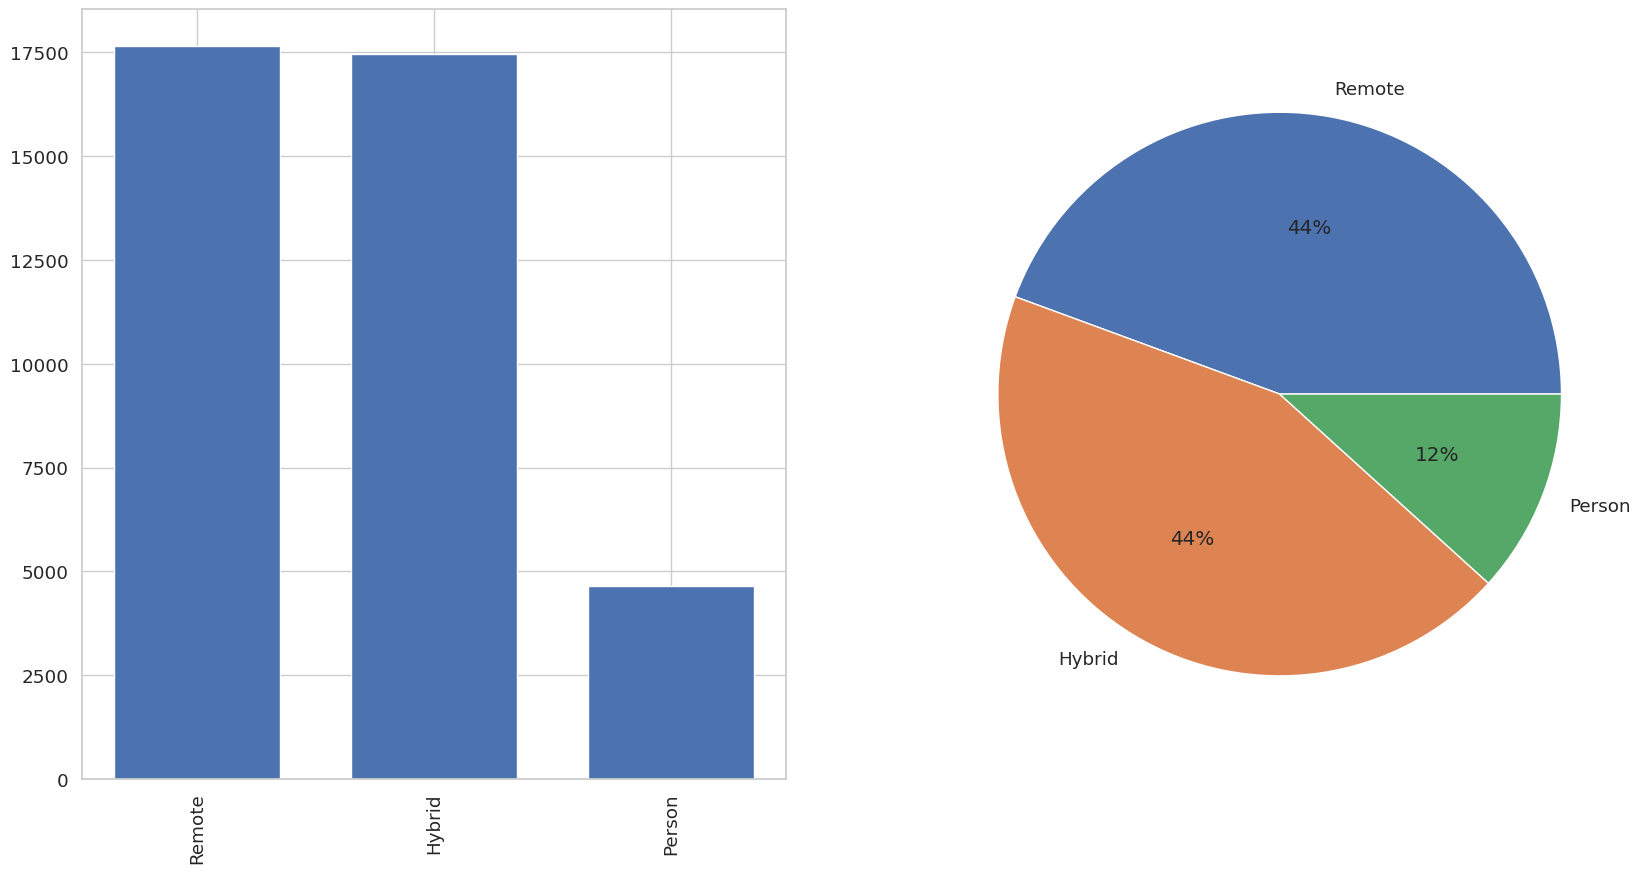

In [ ]:
remote = df["RemoteWork"].value_counts()

label = remote.index
value = remote.values

plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.bar(label, value, width=0.7)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.pie(x=value, labels=label, autopct='%.0f%%')

plt.show()

### EdLevel

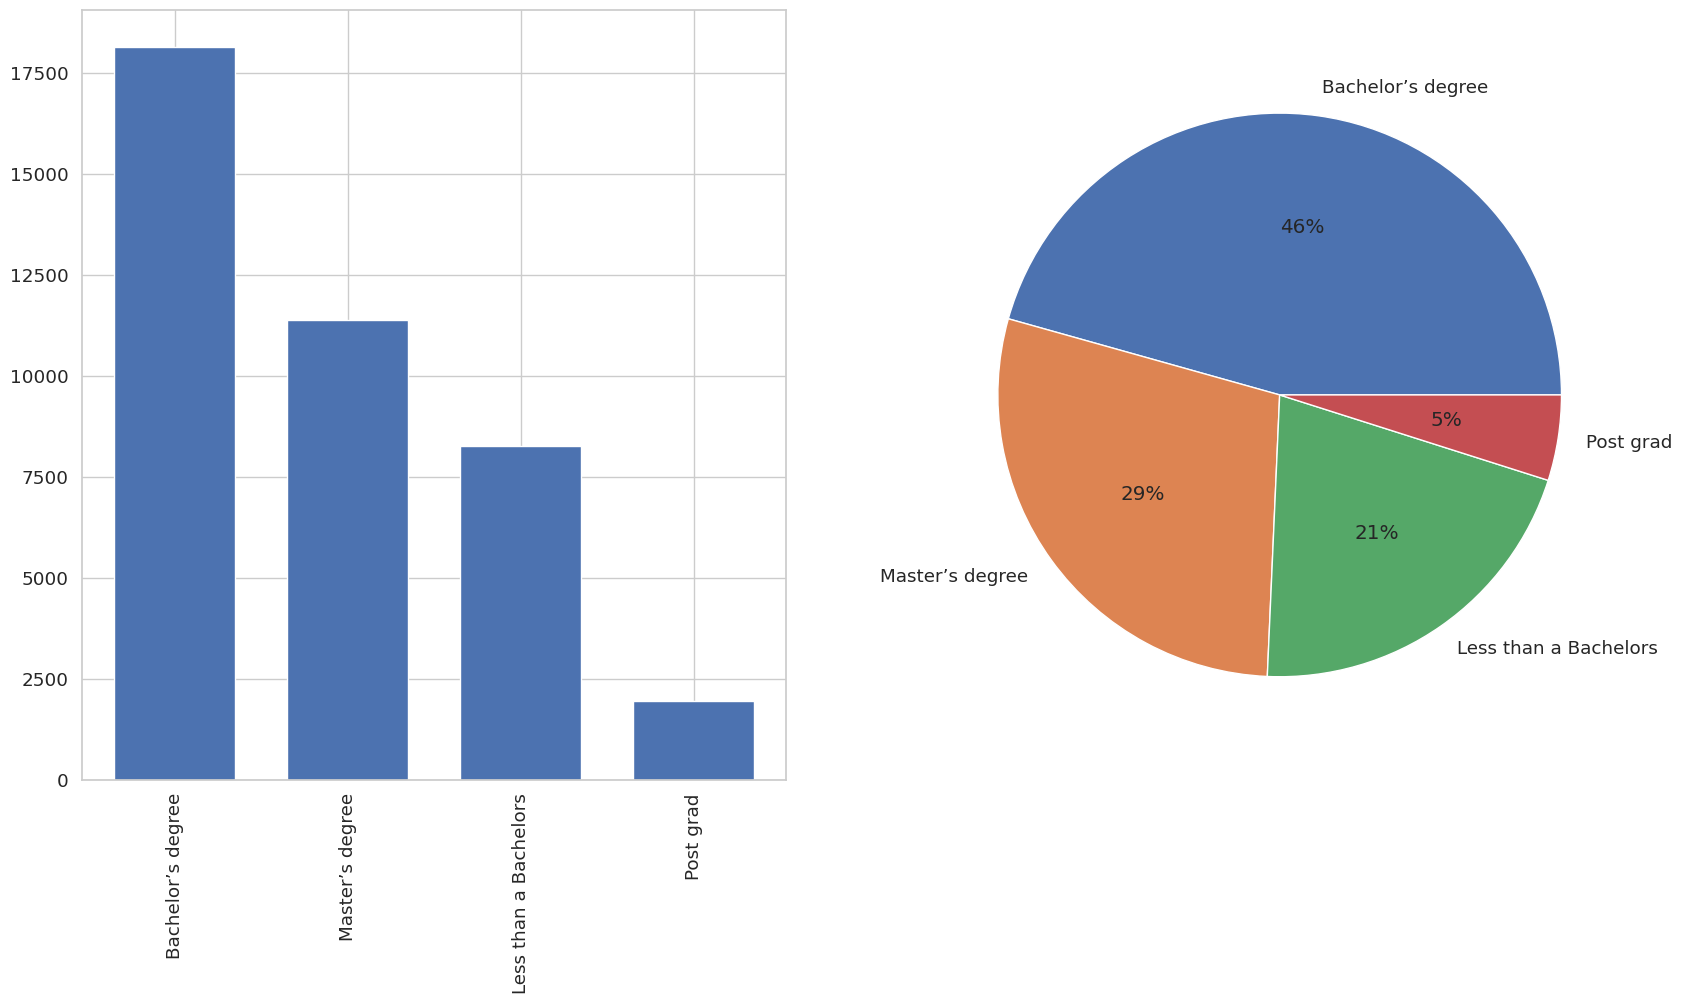

In [ ]:
ed = df["EdLevel"].value_counts()

label = ed.index
value = ed.values

plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.bar(label, value, width=0.7)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.pie(x=value, labels=label, autopct='%.0f%%')

plt.show()

### YearsCodePro

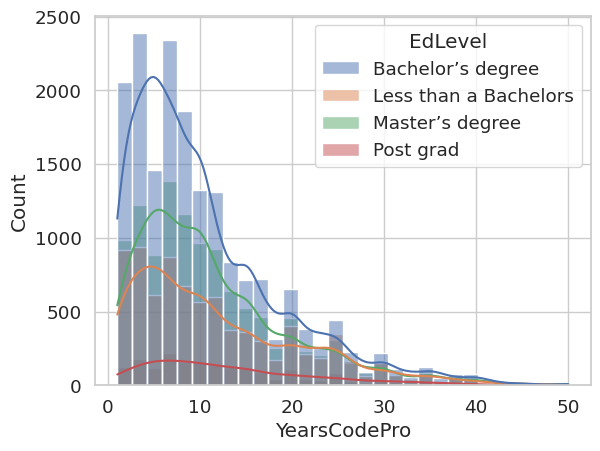

In [ ]:
sns.histplot(data=df, x="YearsCodePro", hue="EdLevel", kde=True, bins=30)
plt.show()

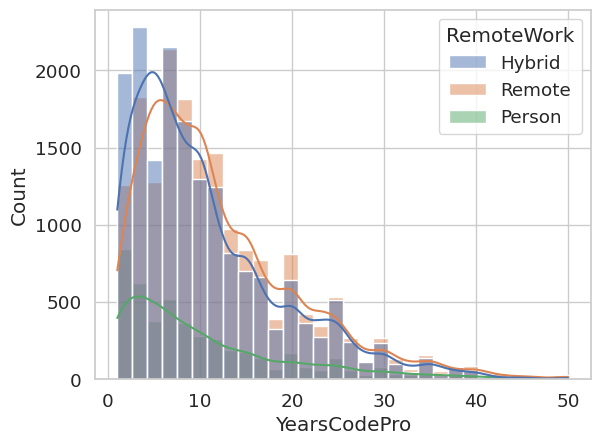

In [ ]:
sns.histplot(data=df, x="YearsCodePro", hue="RemoteWork", kde=True, bins=30)
plt.show()

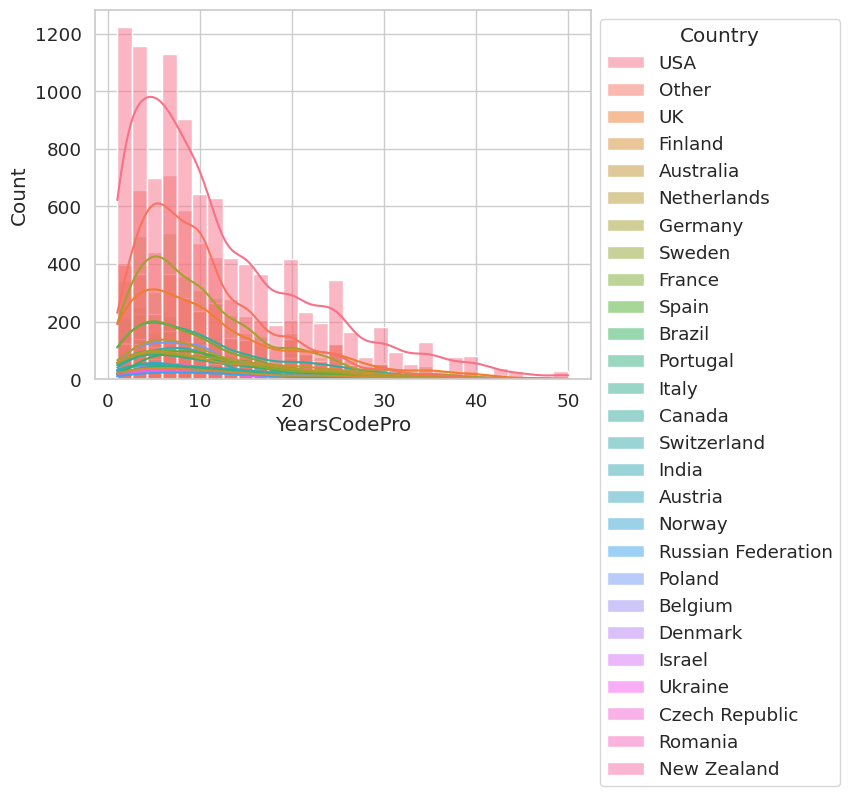

In [ ]:
ax = sns.histplot(data=df, x="YearsCodePro", hue="Country", kde=True, bins=30)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

### DevType

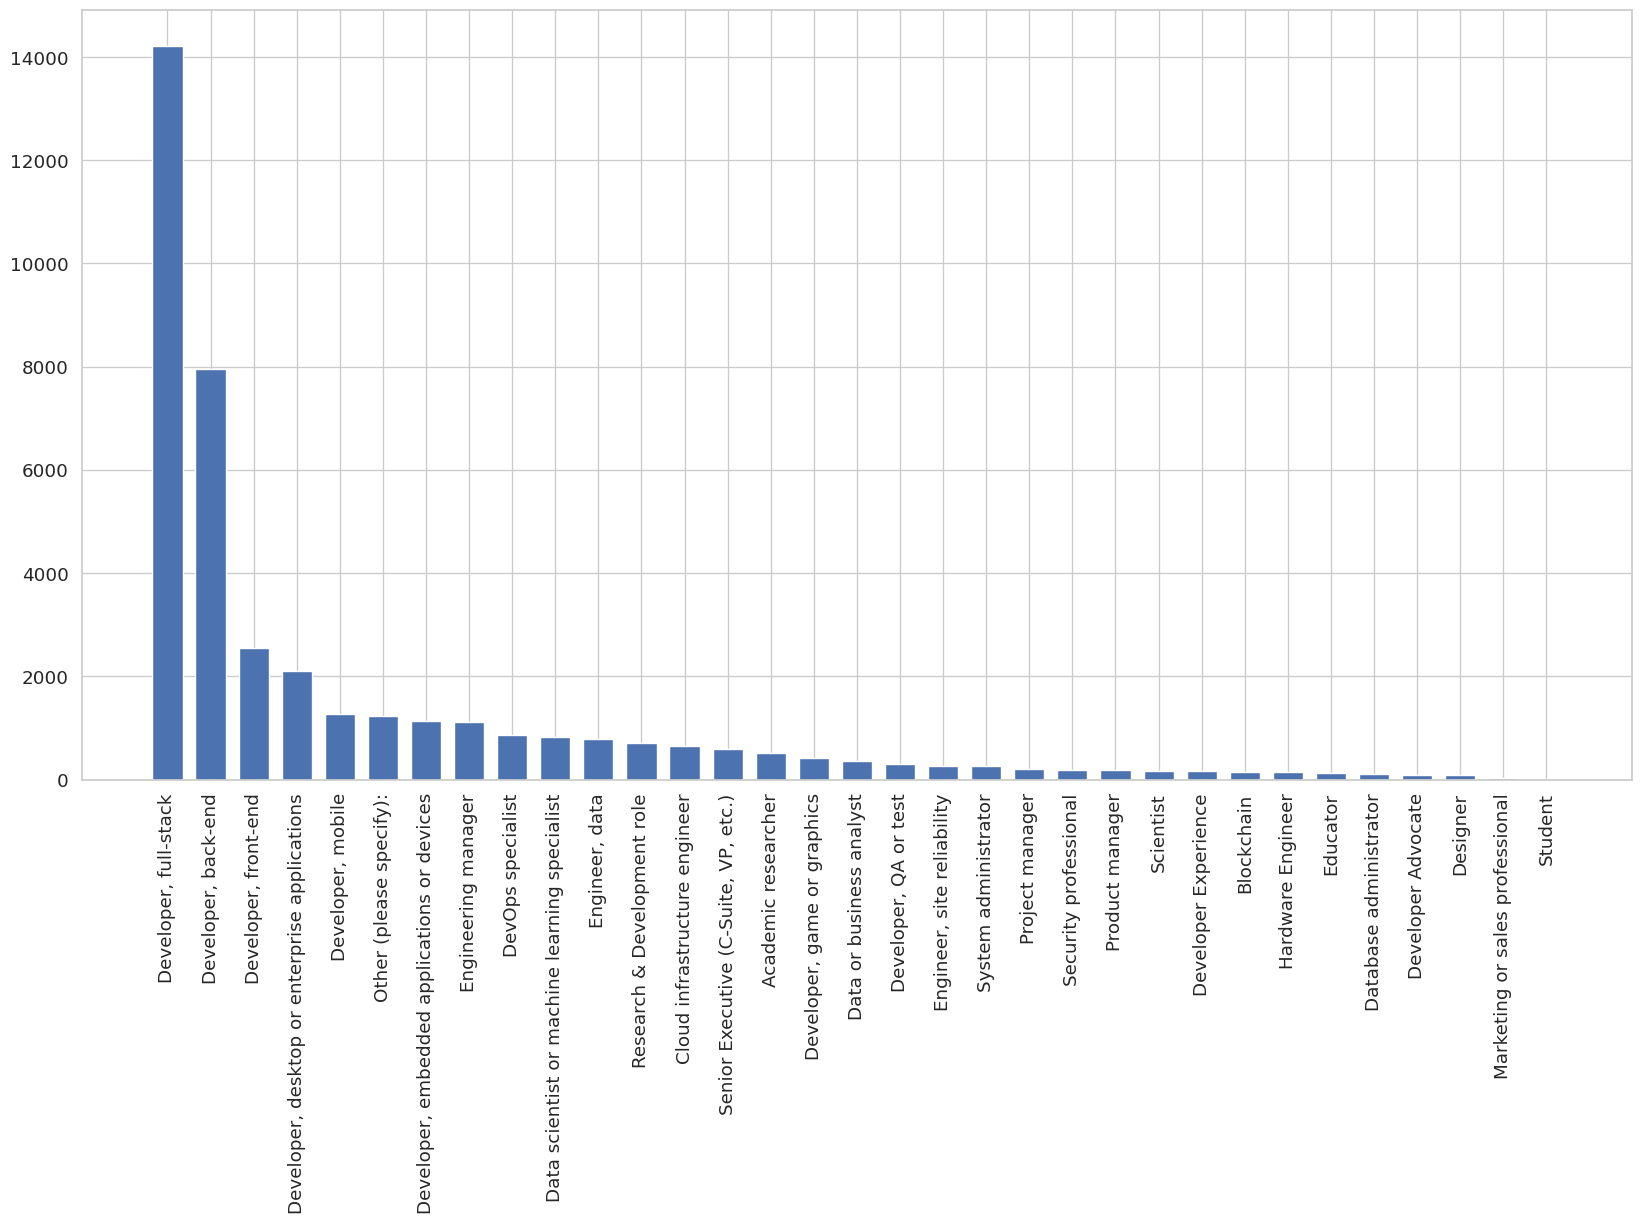

In [ ]:
Dev_Type = df['DevType'].value_counts()

label = Dev_Type.index
value = Dev_Type.values

plt.figure(figsize=(20, 10))
#plt.subplot(2,2,1)
plt.bar(label, value, width=0.7)
plt.xticks(rotation=90)

#plt.subplot(2,2,2)
#plt.pie(x=value, labels=label, autopct='%.0f%%')


plt.show()

### Country

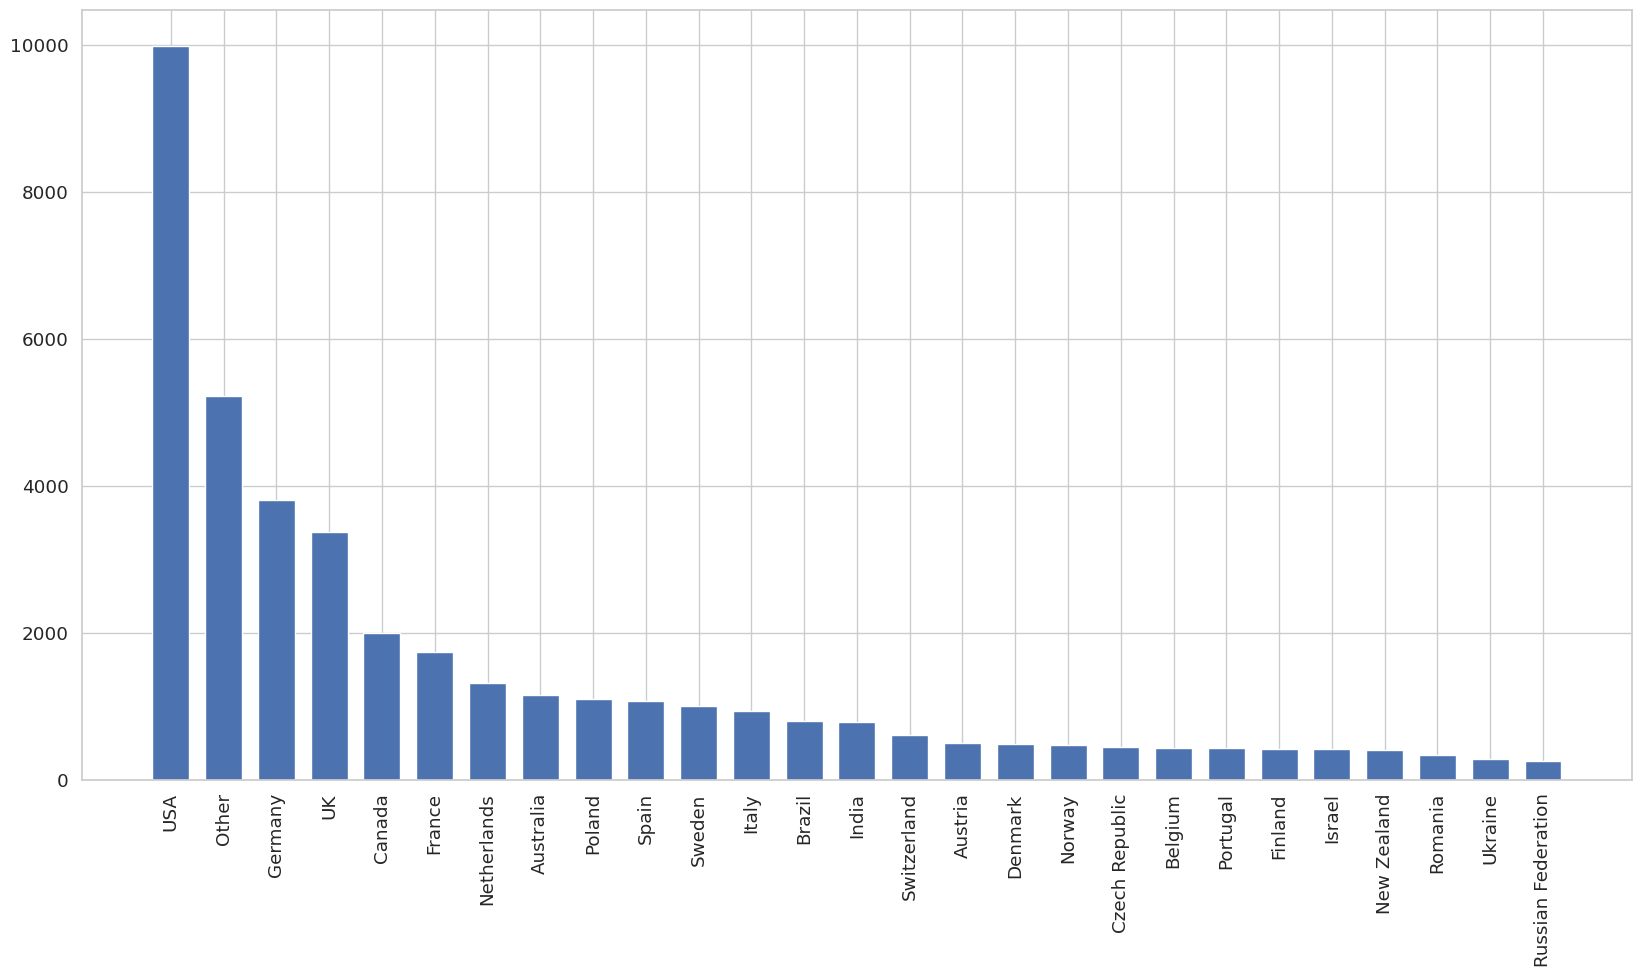

In [ ]:
country = df["Country"].value_counts()

label = country.index
value = country.values

plt.figure(figsize=(20, 10))
#plt.subplot(1,2,1)
plt.bar(label, value, width=0.7)
plt.xticks(rotation=90)

#plt.subplot(1,2,2)
#plt.pie(x=value, labels=label, autopct='%.0f%%')

plt.show()

### Age

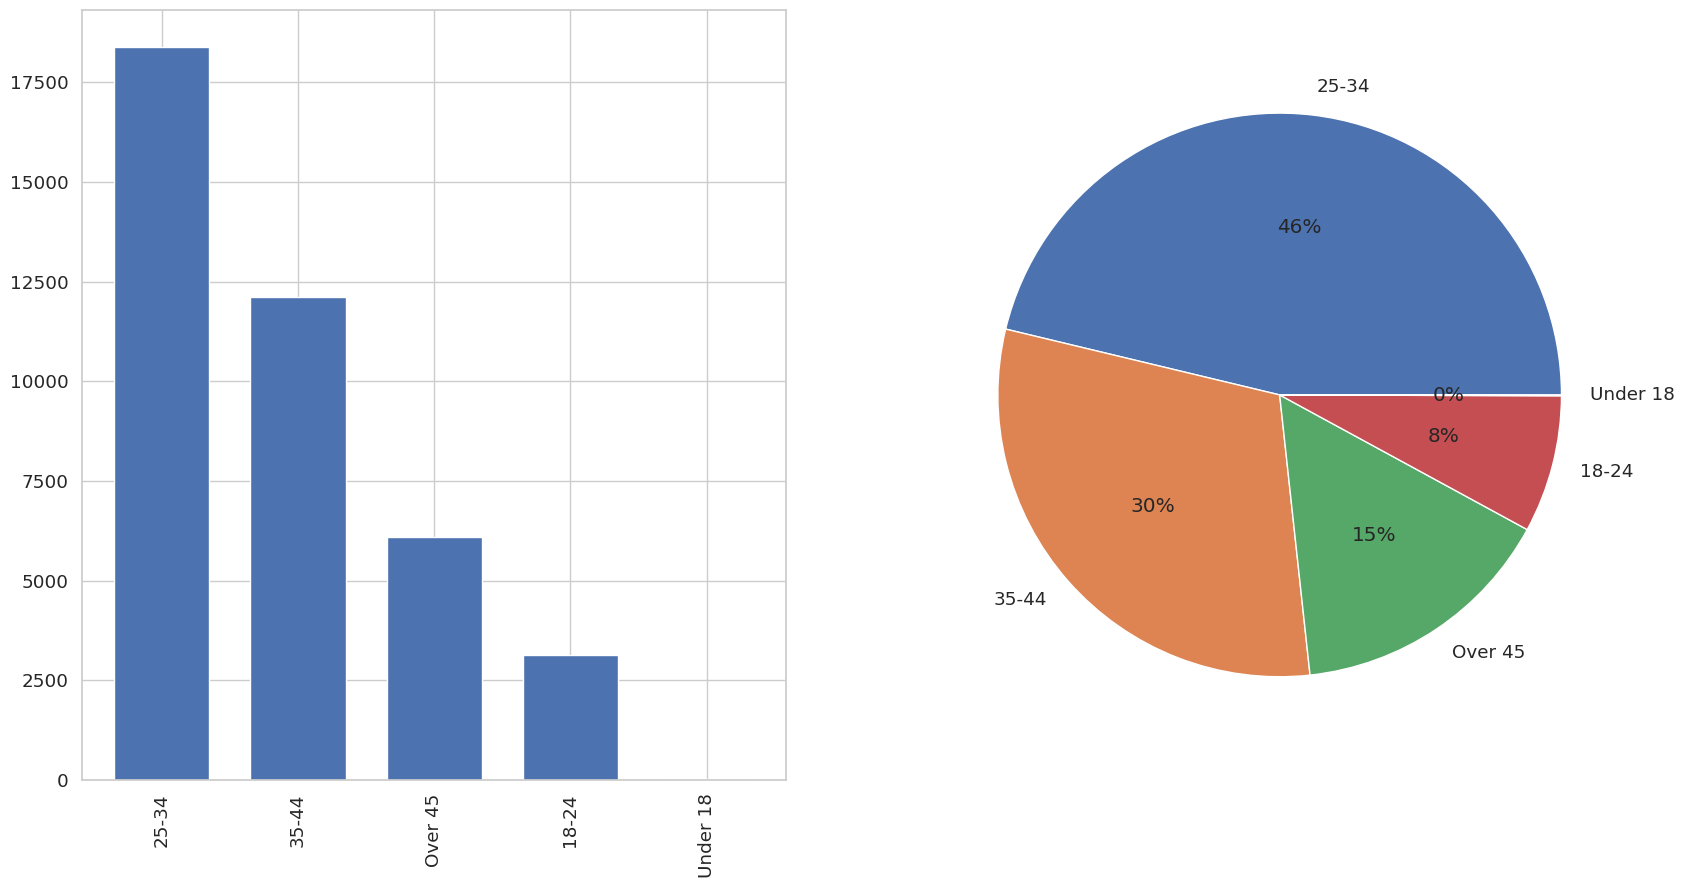

In [ ]:
age = df["Age"].value_counts()

label = age.index
value = age.values

plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.bar(label, value, width=0.7)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.pie(x=value, labels=label, autopct='%.0f%%')

plt.show()

### LanguageHaveWorkedWith

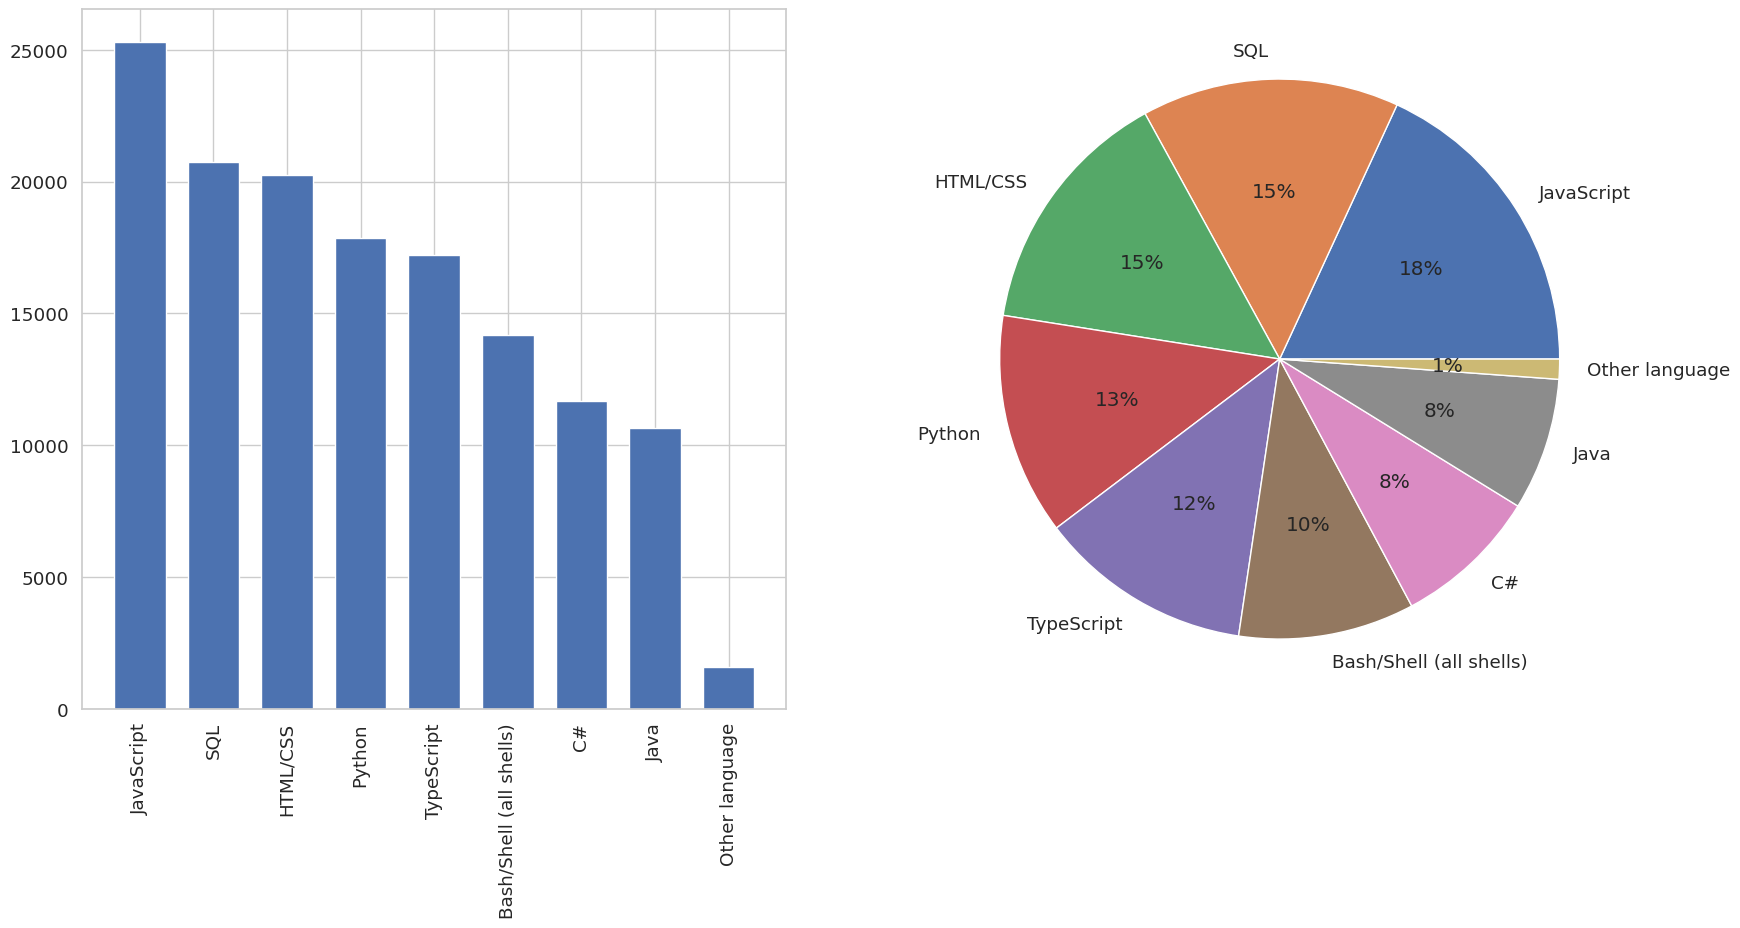

In [ ]:
language = df[selected_language]

sum_values = language.sum()
sorted_values = sum_values.sort_values(ascending=False)

label = sorted_values.index
value = sorted_values.values

plt.figure(figsize=(20, 20))
plt.subplot(2,2,1)
plt.bar(label, value, width=0.7)
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.pie(x=value, labels=label, autopct='%.0f%%')

plt.show()

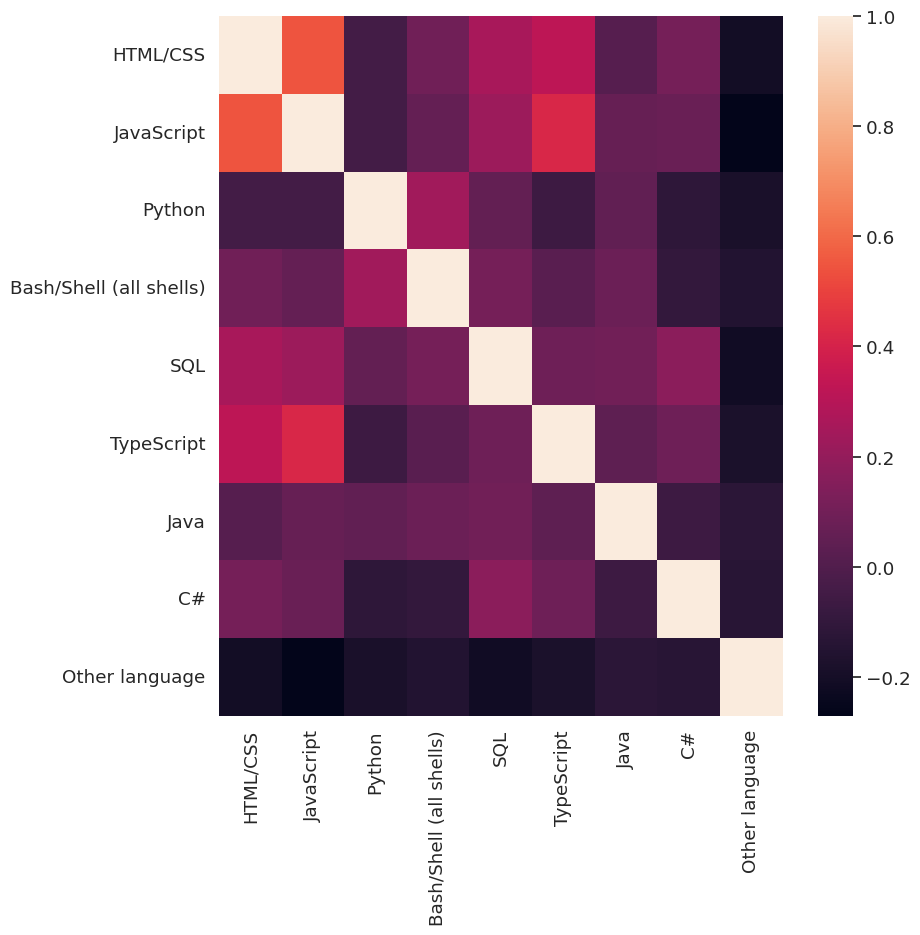

In [ ]:
plt.figure(figsize=(20, 20))

plt.subplot(2,2,4)
sns.heatmap(language.iloc[:, :30].corr())

plt.show()

### DatabaseHaveWorkedWith

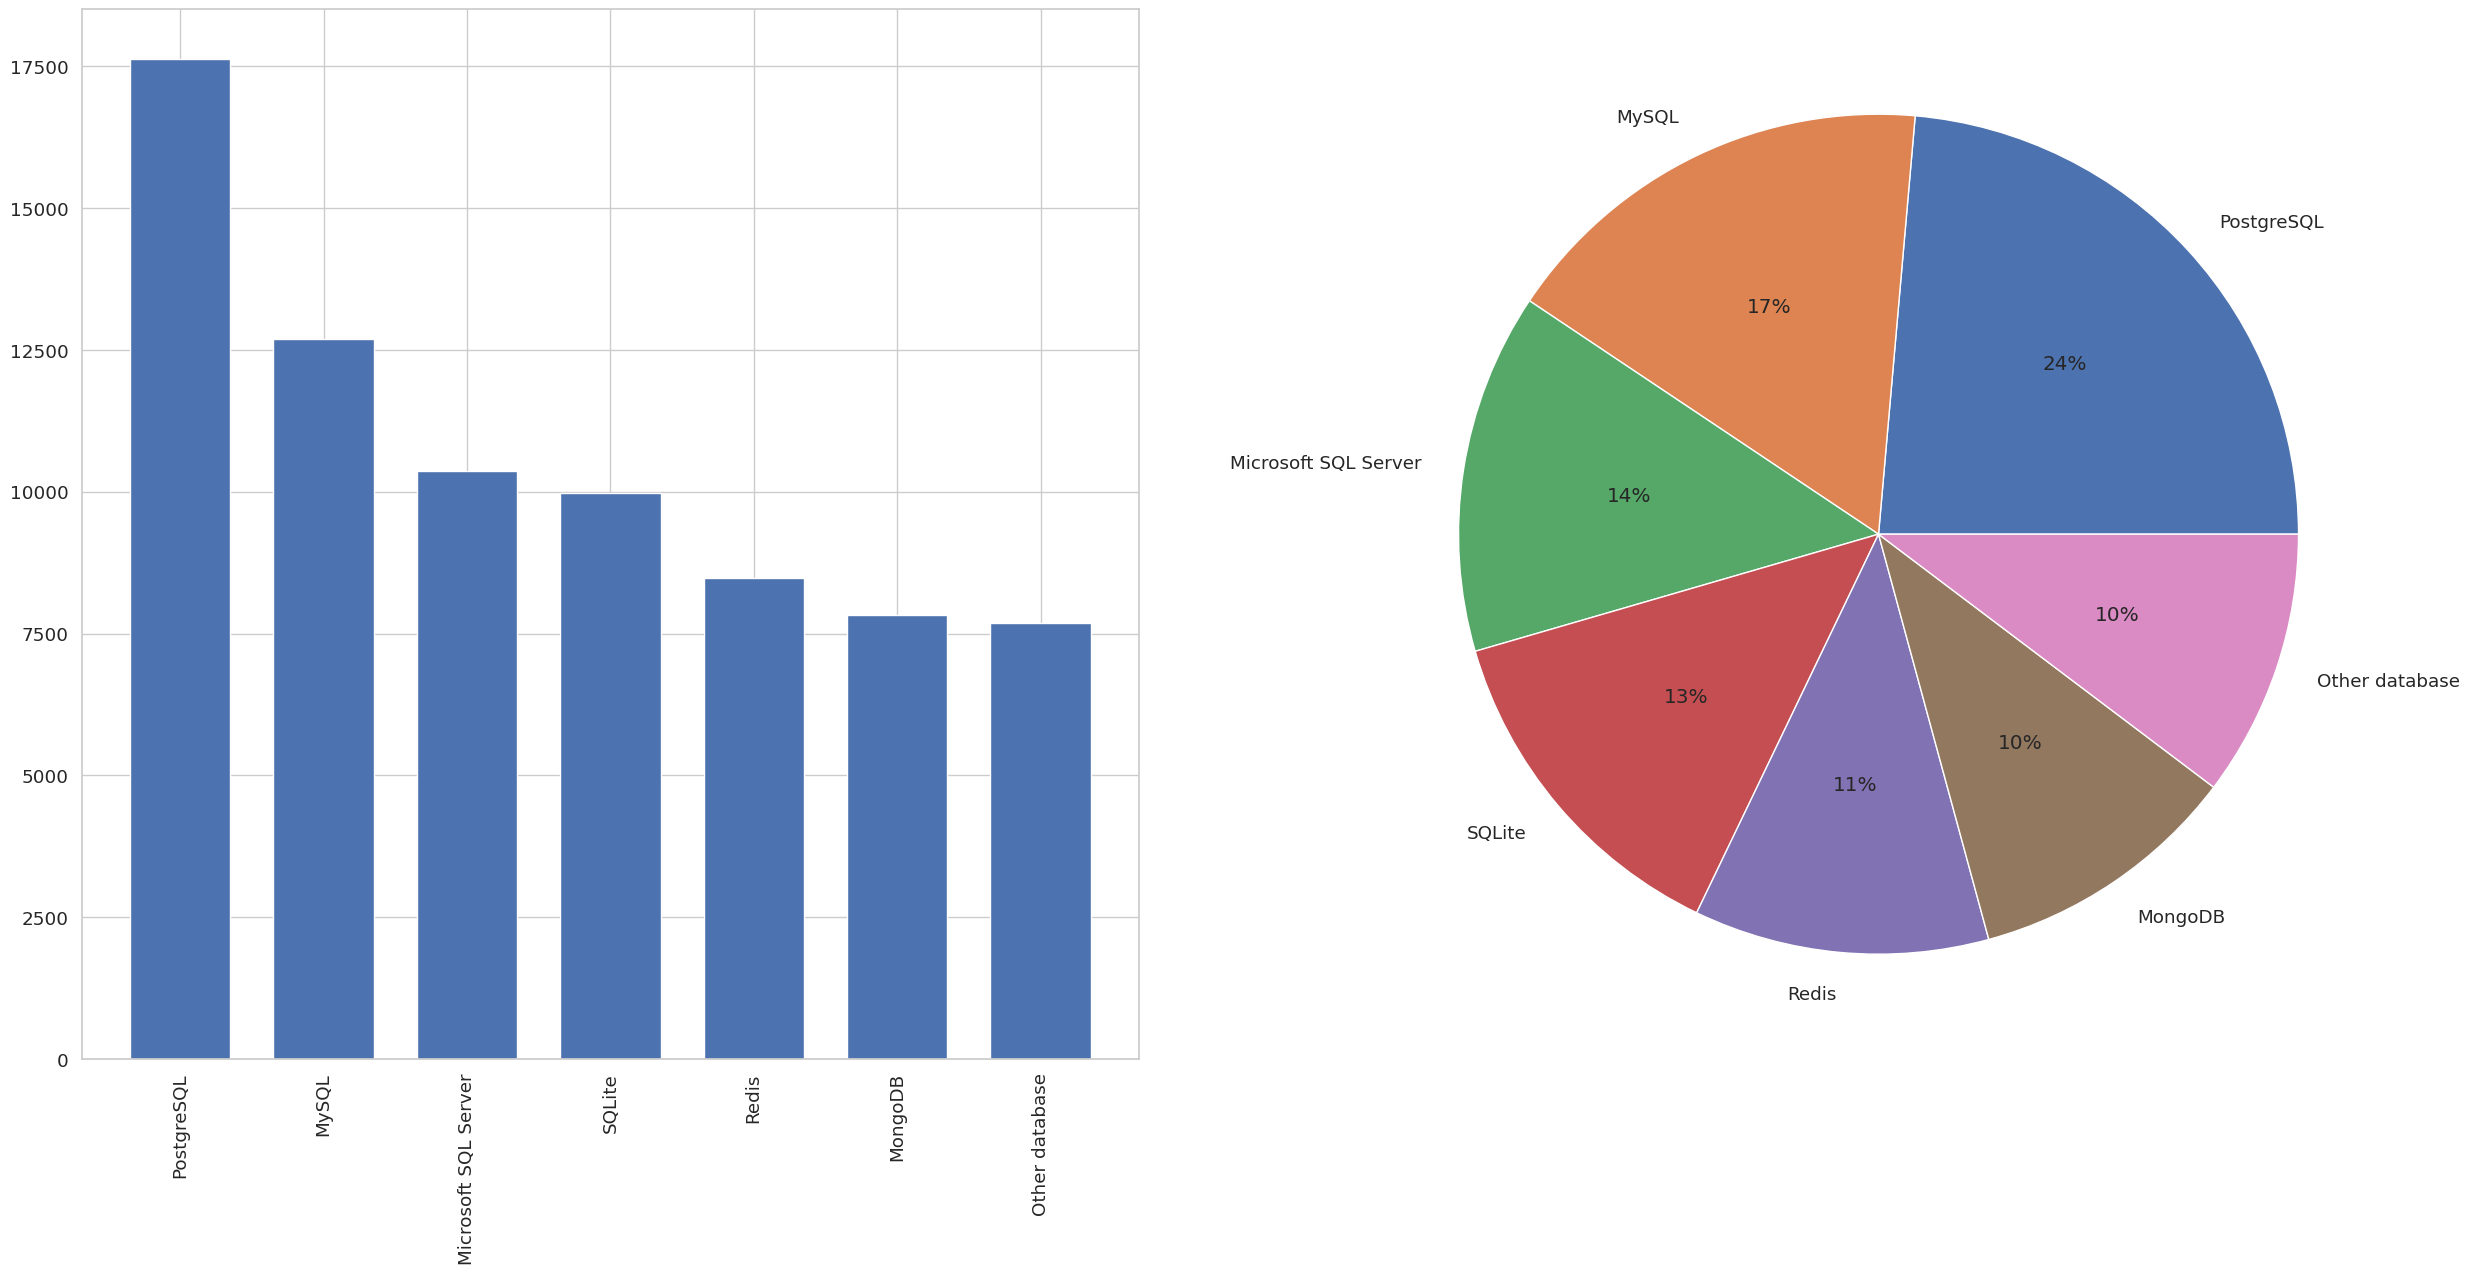

In [ ]:
database = df[selected_database]

sum_values = database.sum()
sorted_values = sum_values.sort_values(ascending=False)

label = sorted_values.index
value = sorted_values.values

plt.figure(figsize=(30, 30))
plt.subplot(2,2,1)
plt.bar(label, value, width=0.7)
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.pie(x=value, labels=label, autopct='%.0f%%')


plt.show()

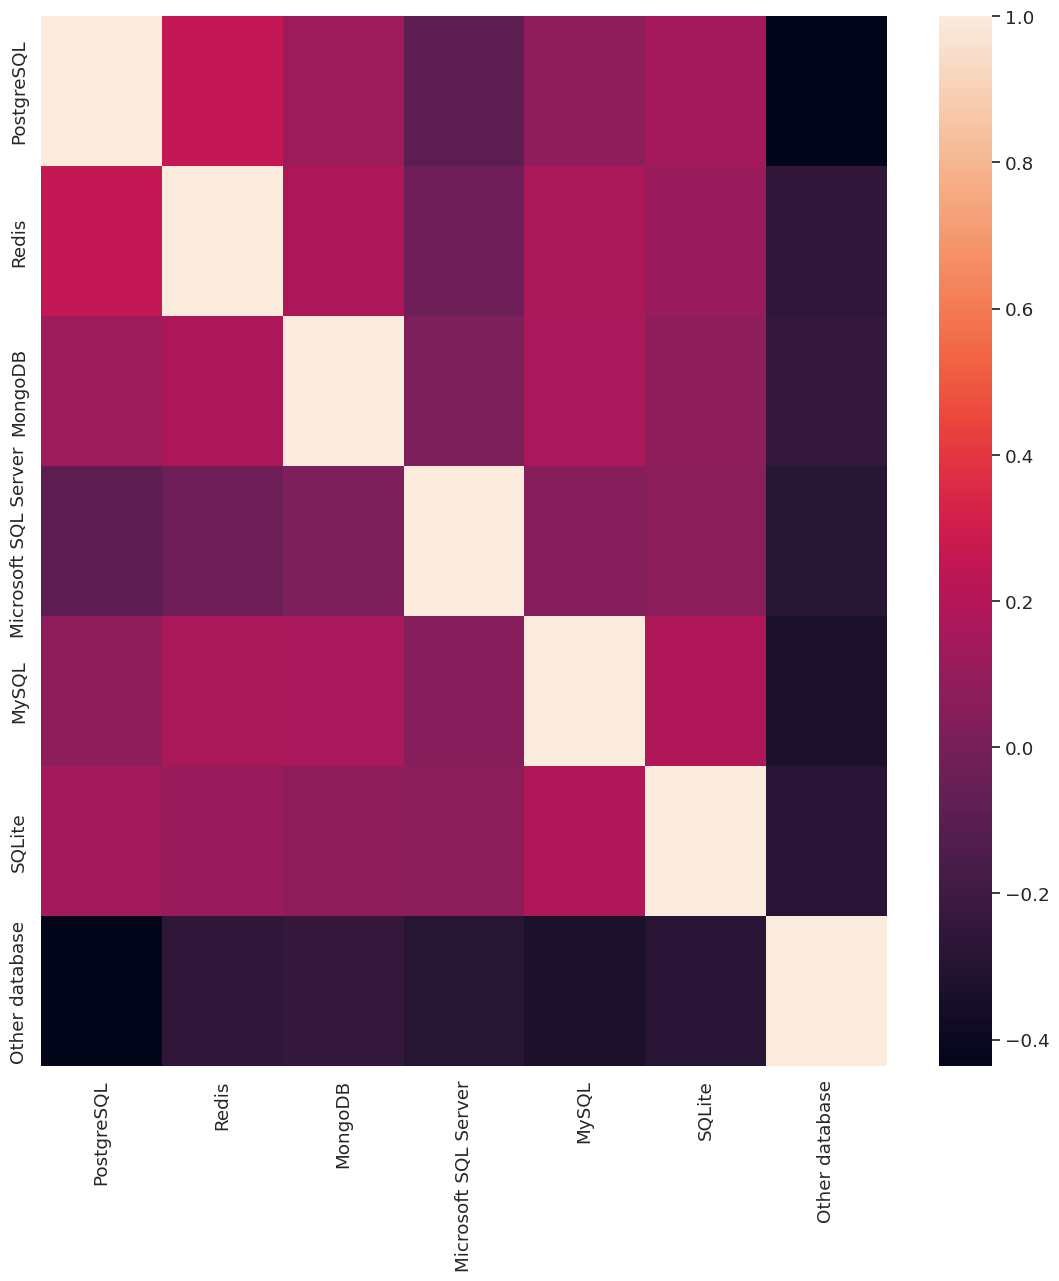

In [ ]:
plt.figure(figsize=(30, 30))
plt.subplot(2,2,3)
sns.heatmap(database.corr())

plt.show()

### PlatformHaveWorkedWith

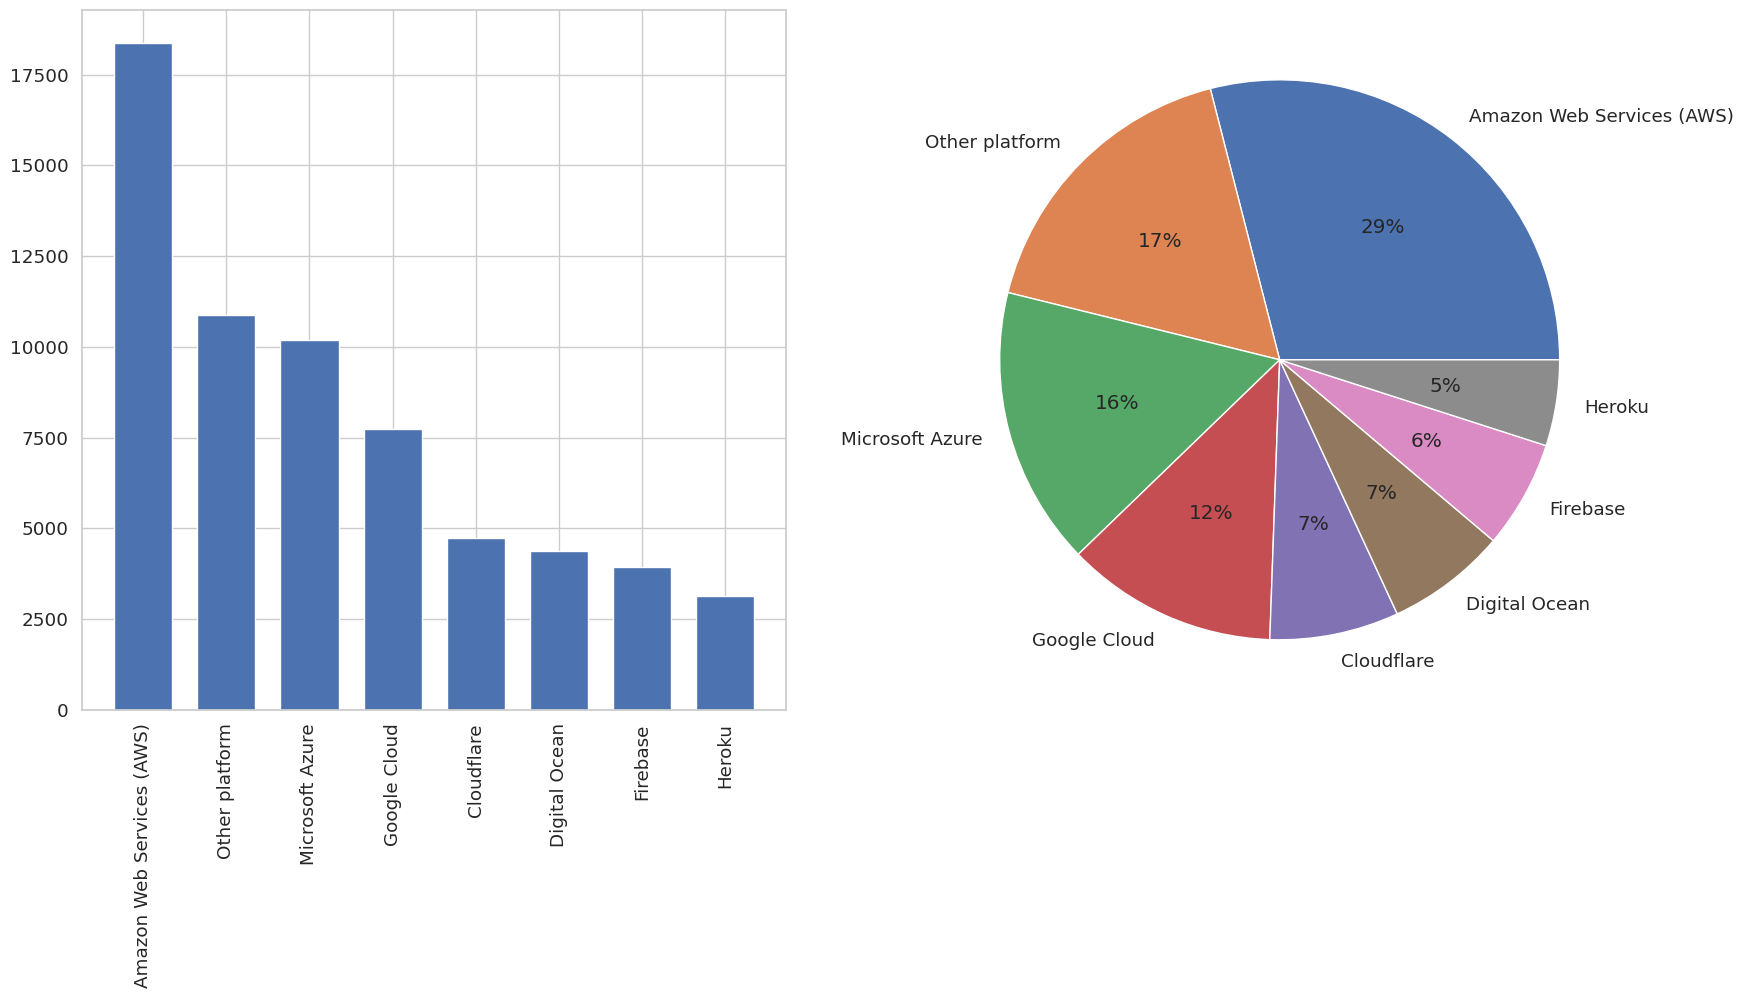

In [ ]:
platform = df[selected_platform]

sum_values = platform.sum()
sorted_values = sum_values.sort_values(ascending=False)

label = sorted_values.index
value = sorted_values.values

plt.figure(figsize=(20, 20))
plt.subplot(2,2,1)
plt.bar(label, value, width=0.7)
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.pie(x=value, labels=label, autopct='%.0f%%')

plt.show()

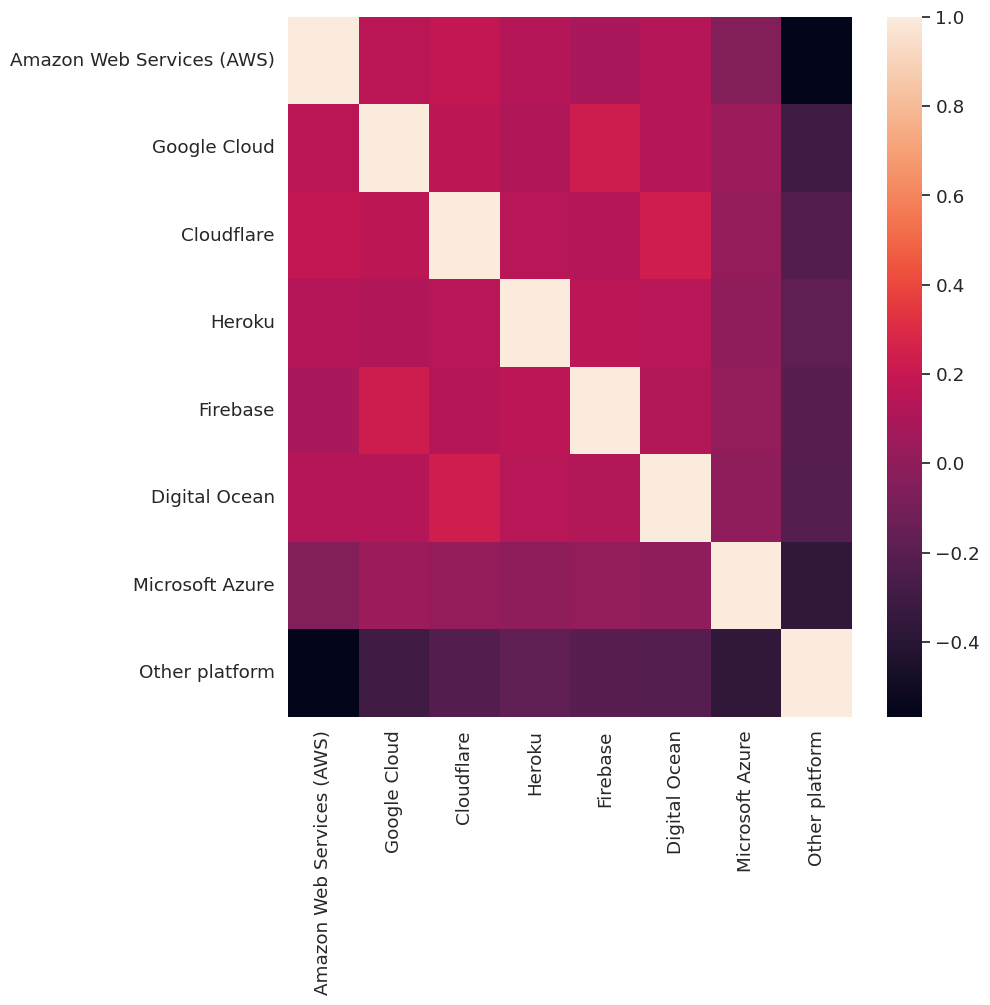

In [ ]:
plt.figure(figsize=(20, 20))
plt.subplot(2,2,4)
sns.heatmap(platform.iloc[:, :30].corr())

plt.show()

### ToolsTechHaveWorkedWith

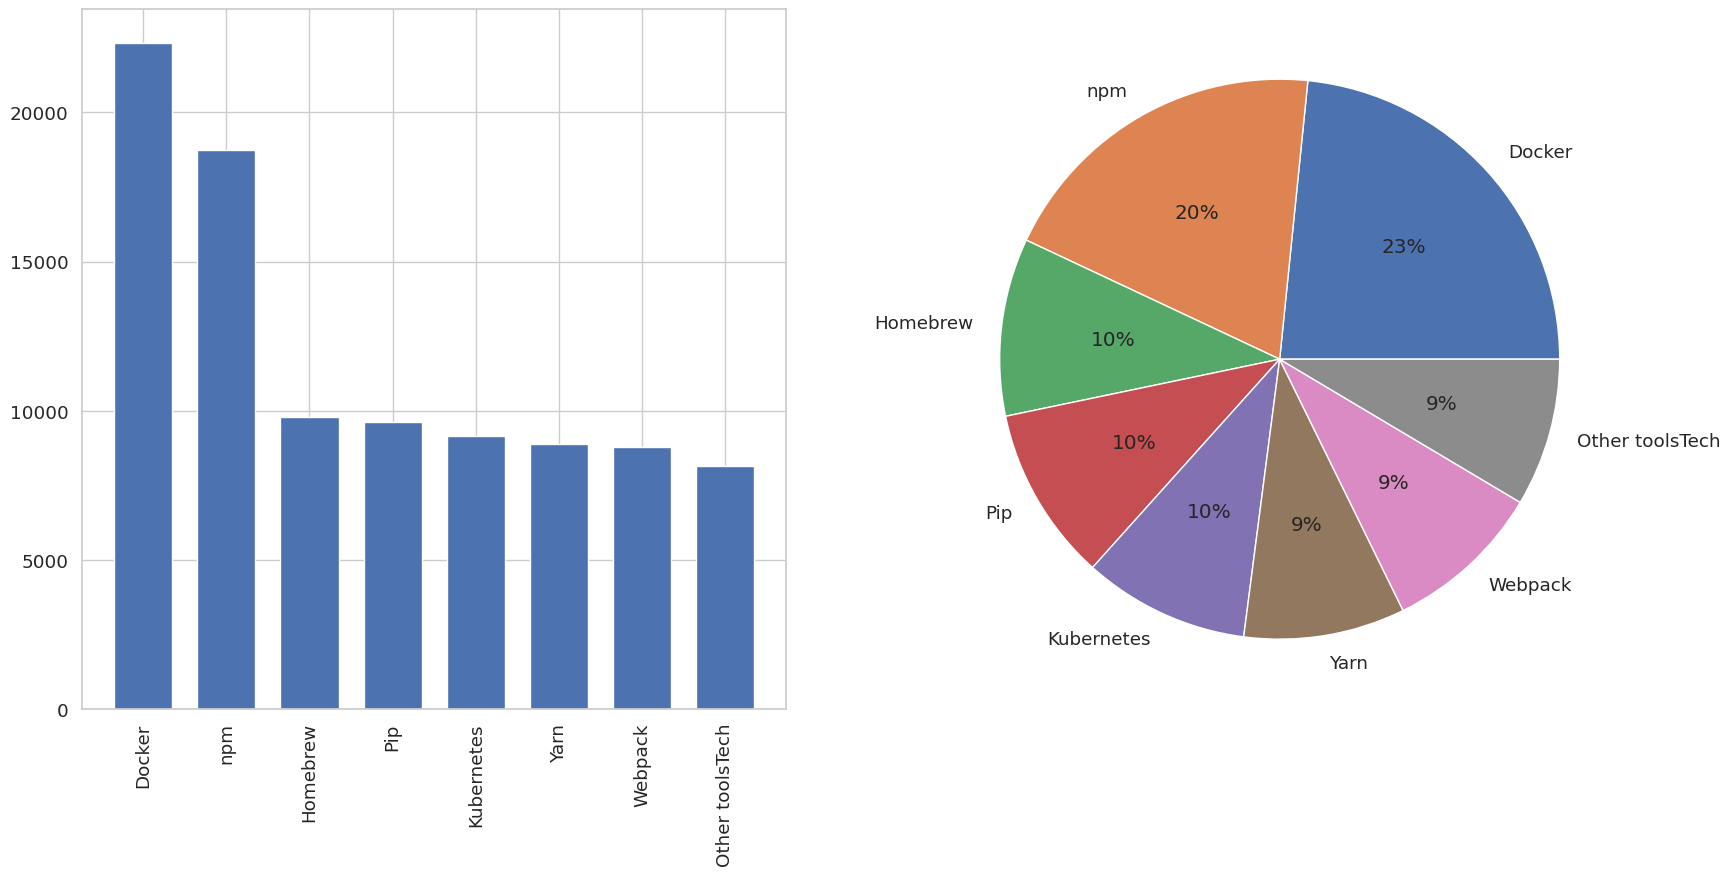

In [ ]:
toolsTech = df[selected_toolsTech]

sum_values = toolsTech.sum()
sorted_values = sum_values.sort_values(ascending=False)

label = sorted_values.index
value = sorted_values.values

plt.figure(figsize=(20, 20))
plt.subplot(2,2,1)
plt.bar(label, value, width=0.7)
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.pie(x=value, labels=label, autopct='%.0f%%')

plt.show()

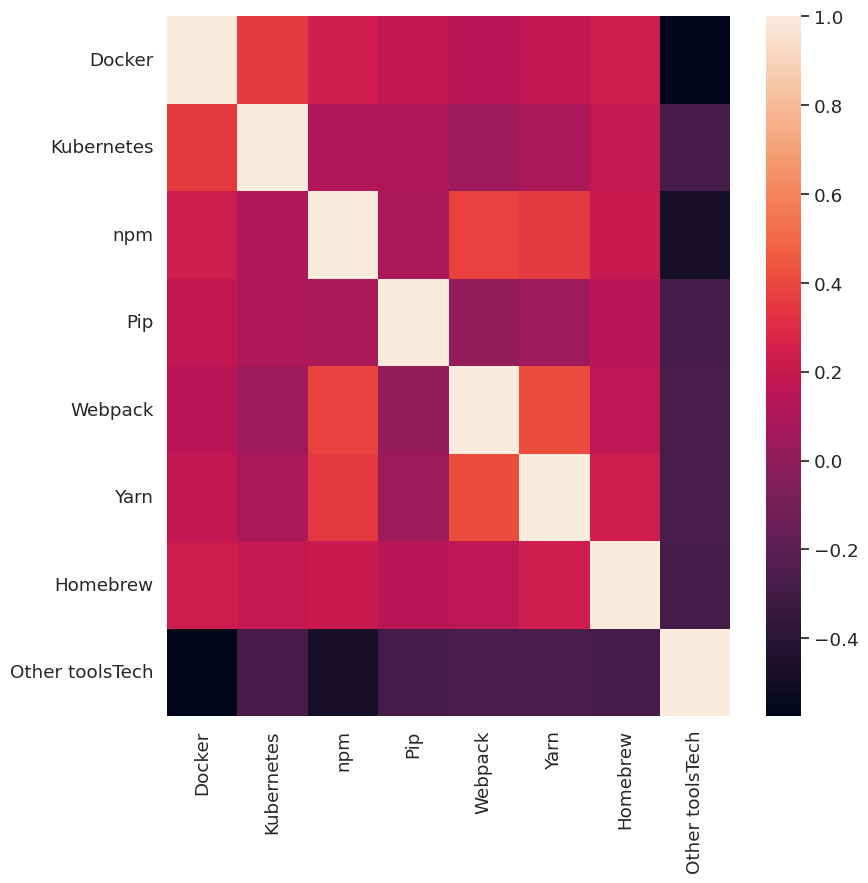

In [ ]:
plt.figure(figsize=(20, 20))

plt.subplot(2,2,4)
sns.heatmap(toolsTech.iloc[:, :30].corr())

plt.show()

### NEWCollabToolsHaveWorkedWith

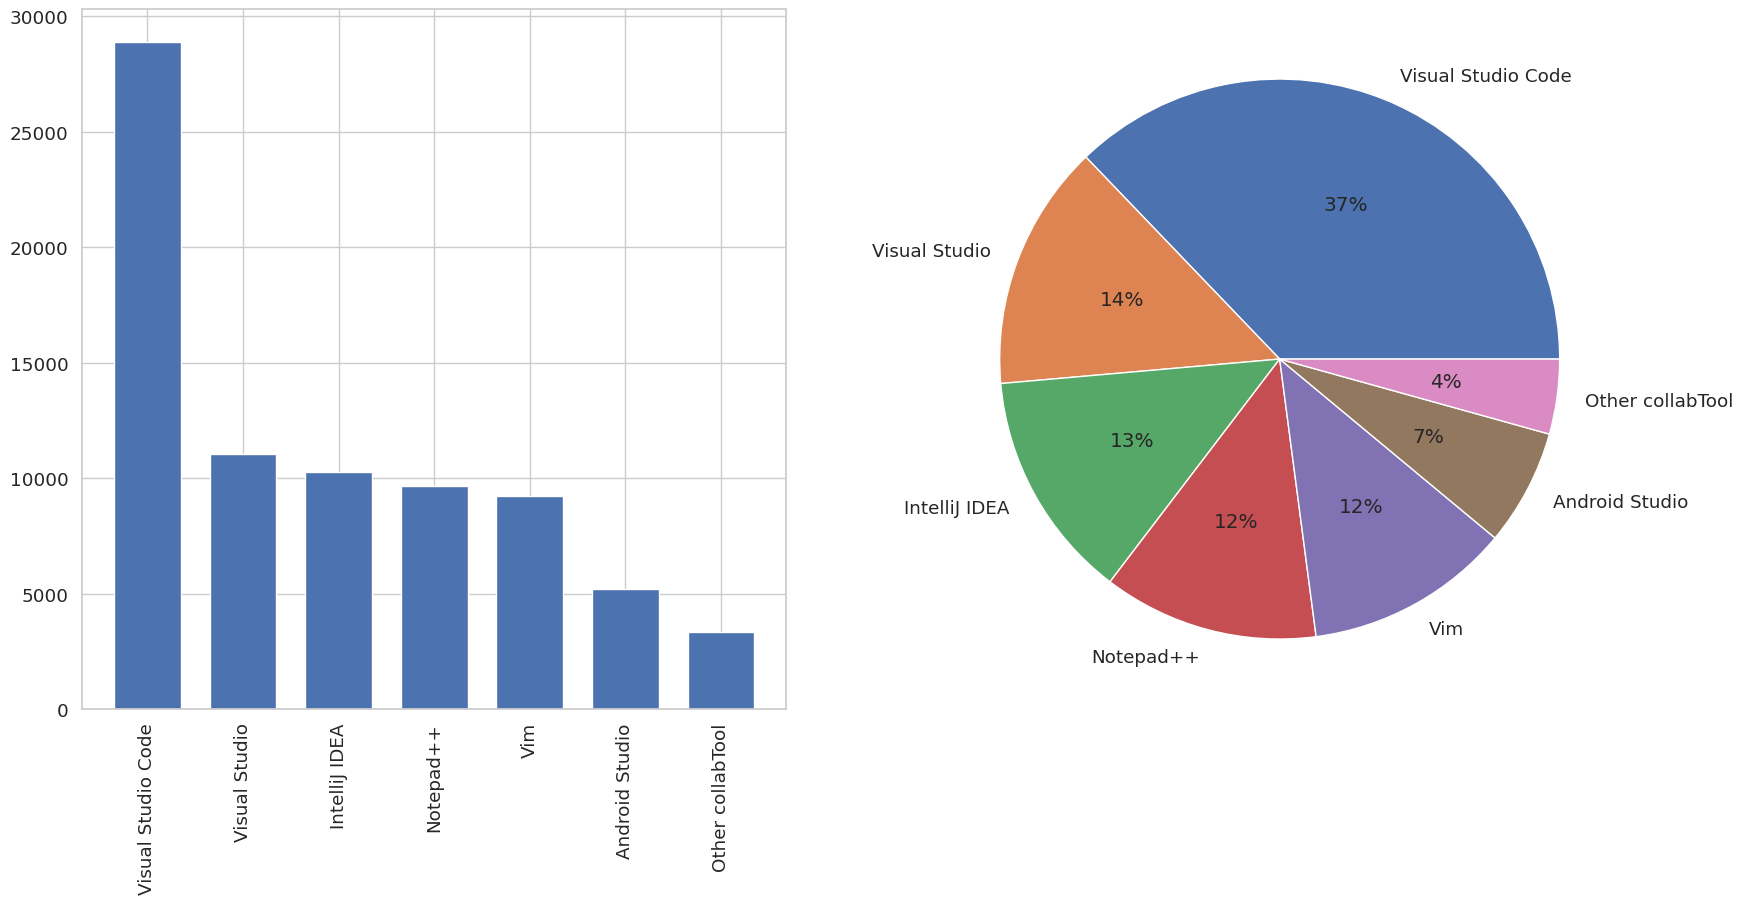

In [ ]:
collabTool = df[selected_collabTool]

sum_values = collabTool.sum()
sorted_values = sum_values.sort_values(ascending=False)

label = sorted_values.index
value = sorted_values.values

plt.figure(figsize=(20, 20))
plt.subplot(2,2,1)
plt.bar(label, value, width=0.7)
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.pie(x=value, labels=label, autopct='%.0f%%')

plt.show()

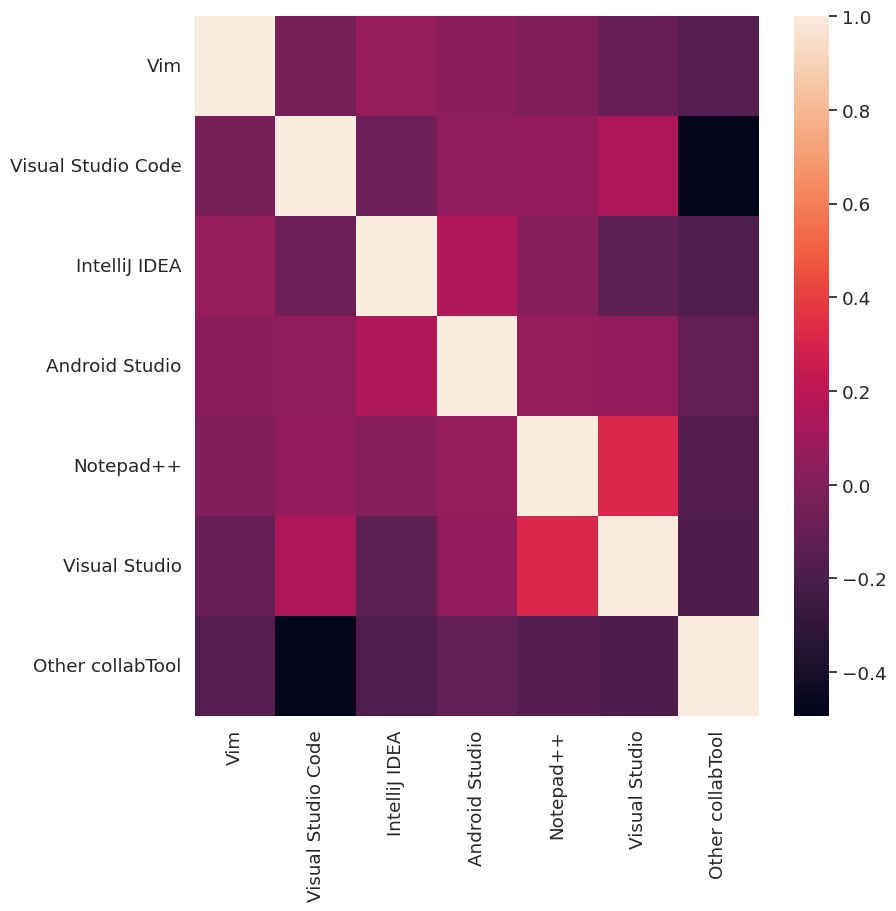

In [ ]:
plt.figure(figsize=(20, 20))

plt.subplot(2,2,4)
sns.heatmap(collabTool.iloc[:, :30].corr())

plt.show()

### Salary

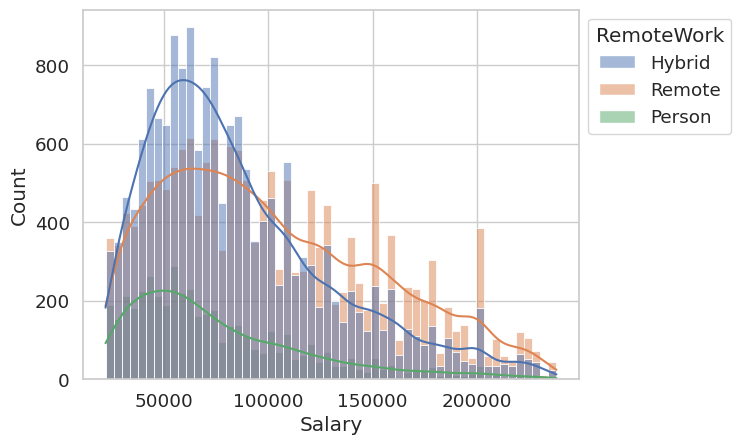

In [ ]:
ax = sns.histplot(data=df, x="Salary", hue="RemoteWork", kde=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

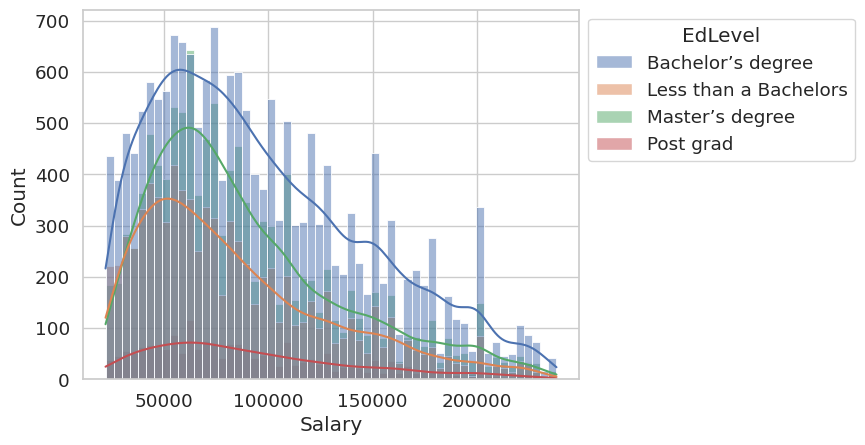

In [ ]:
ax = sns.histplot(data=df, x="Salary", hue="EdLevel", kde=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

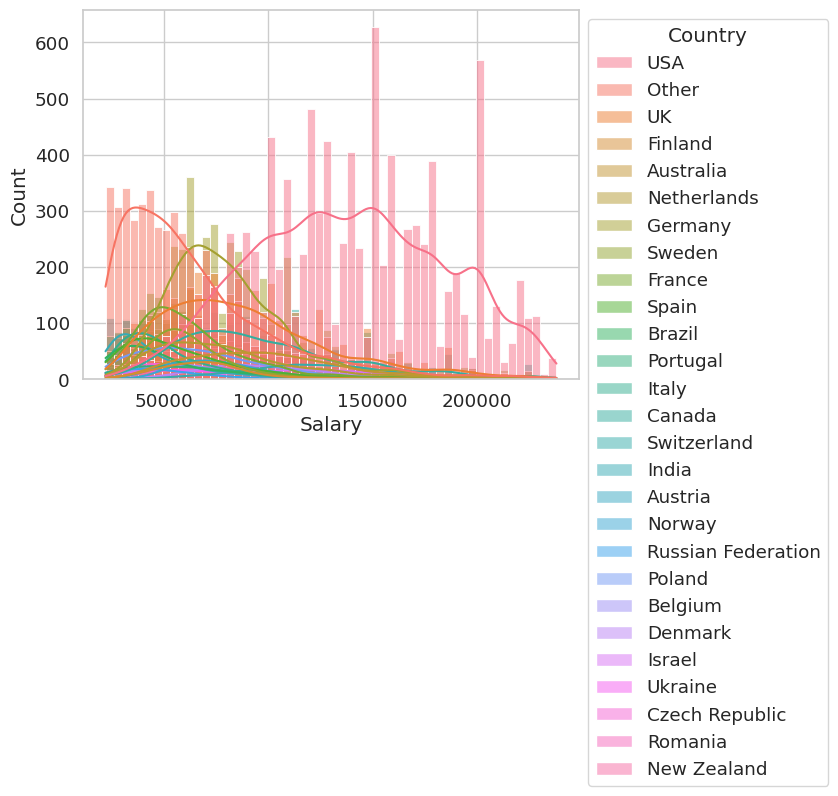

In [ ]:
ax = sns.histplot(data=df, x="Salary", hue="Country", kde=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

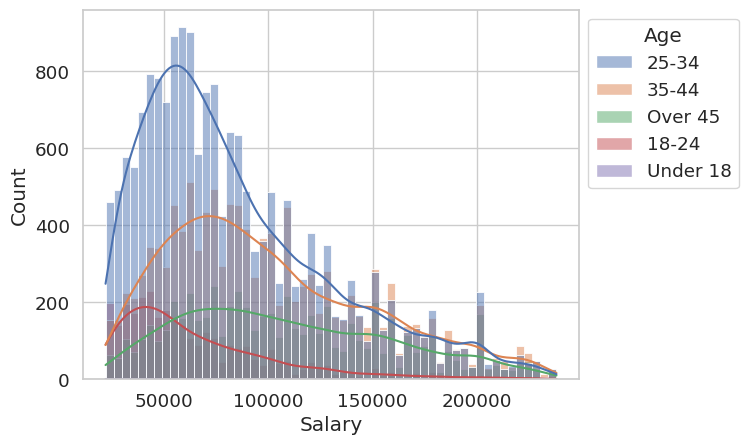

In [ ]:
ax = sns.histplot(data=df, x="Salary", hue="Age", kde=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

## 



In [ ]:
df["RemoteWork"].unique()

array(['Hybrid', 'Remote', 'Person'], dtype=object)

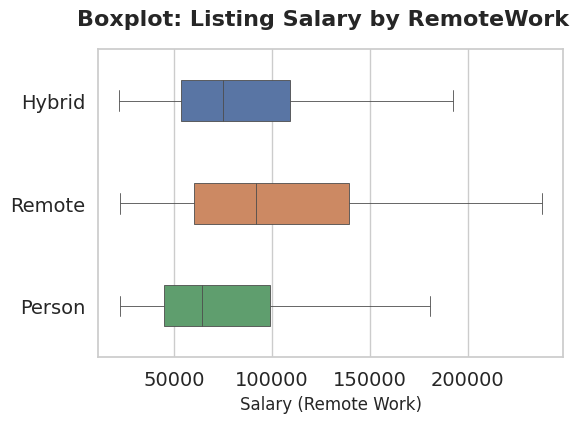

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
dft = df[["RemoteWork", "Salary"]]

sns.boxplot(x='Salary', y='RemoteWork', data=dft, order=['Hybrid', 'Remote', 'Person'],
            showfliers=False, hue='RemoteWork', linewidth=0.6, width=0.4, legend=False)

ax = plt.gca()
ax.set_title("")
ax.set_xlabel("Salary (Remote Work)", fontsize=12)
ax.set_ylabel("")
plt.suptitle("Boxplot: Listing Salary by RemoteWork", fontweight="bold", fontsize=16)

# Đặt kích thước cho nhãn trục y và x
for label in ax.yaxis.get_majorticklabels():
    label.set_size(14)
for label in ax.xaxis.get_majorticklabels():
    label.set_size(14)

plt.show()


In [ ]:
df["EdLevel"].unique()

array(['Bachelor’s degree', 'Less than a Bachelors', 'Master’s degree',
       'Post grad'], dtype=object)

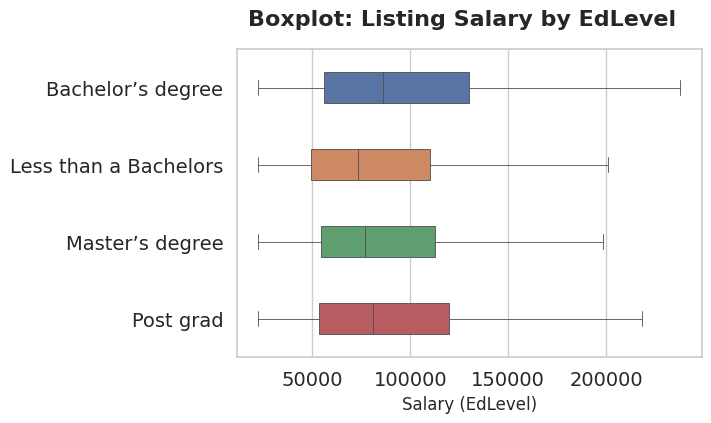

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
dft = df[["EdLevel", "Salary"]]

sns.boxplot(x='Salary', y='EdLevel', data=dft, order=['Bachelor’s degree', 'Less than a Bachelors', 'Master’s degree', 'Post grad'],
            showfliers=False, hue='EdLevel', linewidth=0.6, width=0.4, legend=False)

ax = plt.gca()
ax.set_title("")
ax.set_xlabel("Salary (EdLevel)", fontsize=12)
ax.set_ylabel("")
plt.suptitle("Boxplot: Listing Salary by EdLevel", fontweight="bold", fontsize=16)

# Đặt kích thước cho nhãn trục y và x
for label in ax.yaxis.get_majorticklabels():
    label.set_size(14)
for label in ax.xaxis.get_majorticklabels():
    label.set_size(14)

plt.show()


In [ ]:
df["DevType"].unique()

array(['Developer, front-end', 'Developer, full-stack',
       'Developer, back-end', 'System administrator',
       'Developer, QA or test',
       'Data scientist or machine learning specialist',
       'Data or business analyst', 'Security professional',
       'Research & Development role', 'Database administrator',
       'Developer, embedded applications or devices',
       'Developer, desktop or enterprise applications', 'Engineer, data',
       'Product manager', 'Cloud infrastructure engineer',
       'Senior Executive (C-Suite, VP, etc.)', 'Other (please specify):',
       'Developer Experience', 'Engineering manager', 'Developer, mobile',
       'DevOps specialist', 'Engineer, site reliability',
       'Project manager', 'Academic researcher',
       'Developer, game or graphics', 'Developer Advocate',
       'Hardware Engineer', 'Blockchain', 'Educator', 'Scientist',
       'Marketing or sales professional', 'Designer', 'Student'],
      dtype=object)

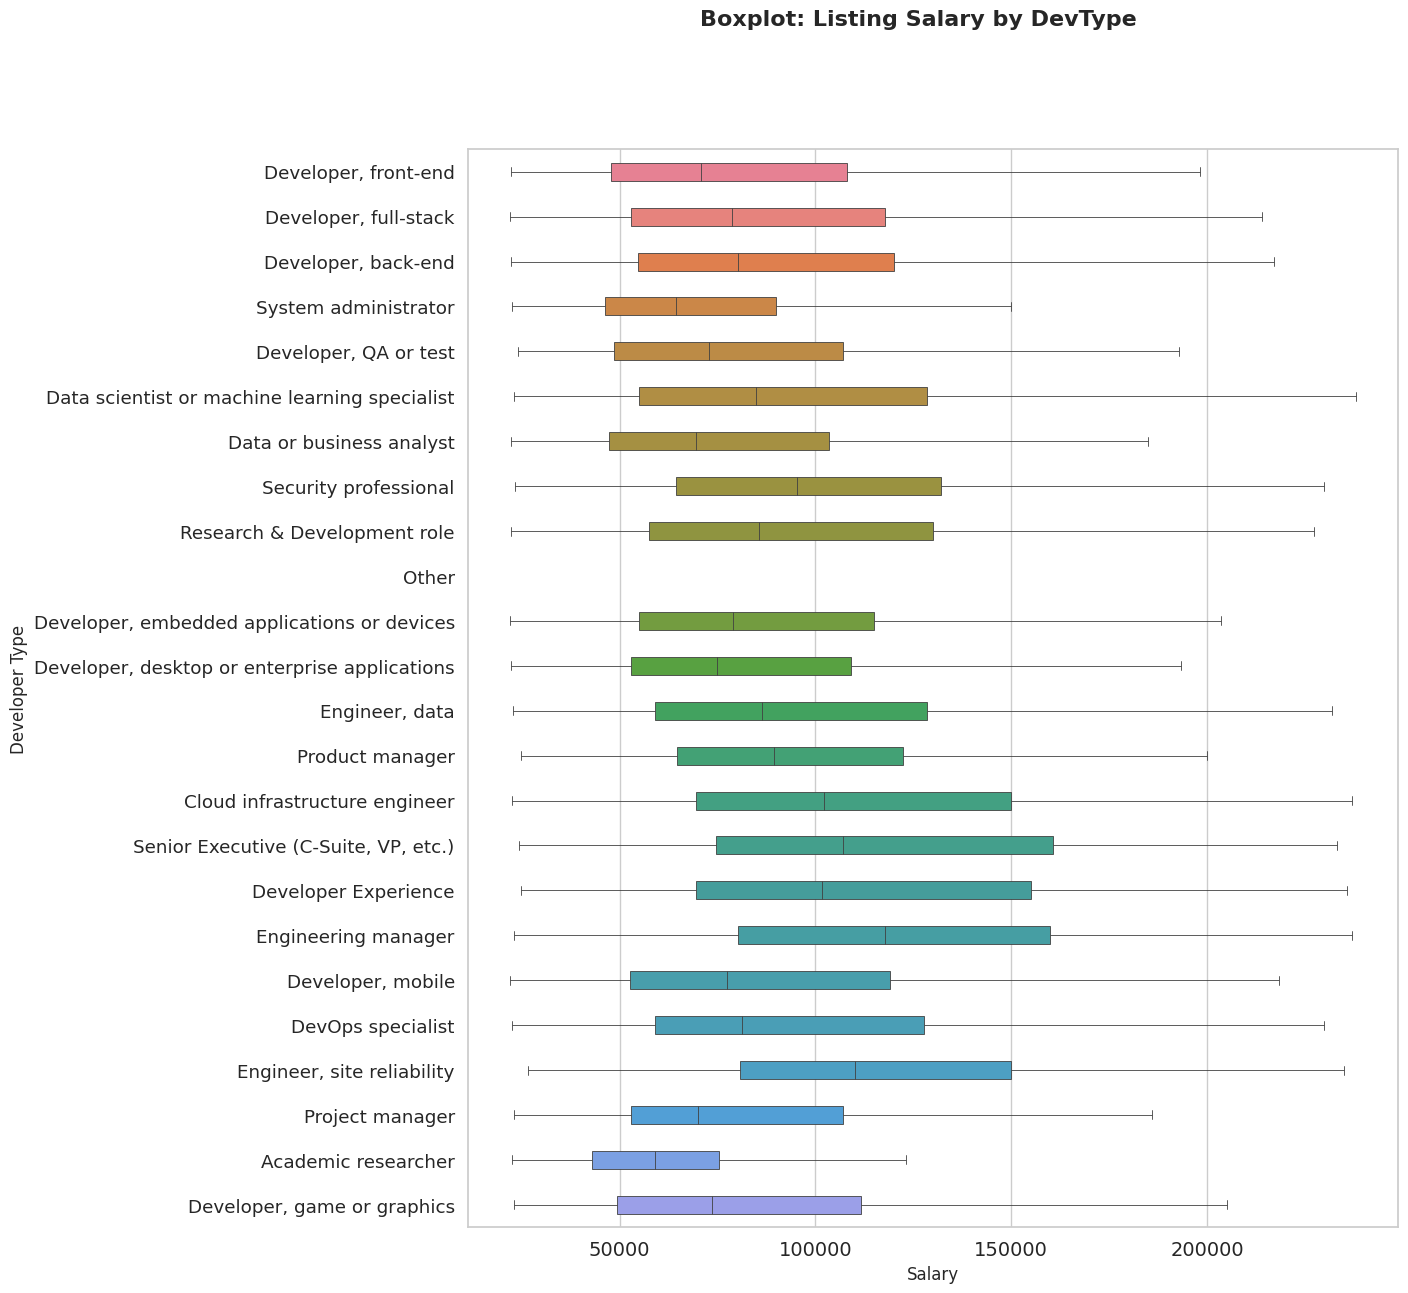

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 14))
dft = df[["DevType", "Salary"]]

sns.boxplot(x='Salary', y='DevType', data=dft, order=['Developer, front-end', 'Developer, full-stack',
       'Developer, back-end', 'System administrator',
       'Developer, QA or test',
       'Data scientist or machine learning specialist',
       'Data or business analyst', 'Security professional',
       'Research & Development role', 'Other',
       'Developer, embedded applications or devices',
       'Developer, desktop or enterprise applications', 'Engineer, data',
       'Product manager', 'Cloud infrastructure engineer',
       'Senior Executive (C-Suite, VP, etc.)', 'Developer Experience',
       'Engineering manager', 'Developer, mobile', 'DevOps specialist',
       'Engineer, site reliability', 'Project manager',
       'Academic researcher', 'Developer, game or graphics'],
            showfliers=False, hue='DevType', linewidth=0.6, width=0.4, legend=False)

ax = plt.gca()
ax.set_title("")
ax.set_xlabel("Salary", fontsize=12)
ax.set_ylabel("Developer Type", fontsize=12)
plt.suptitle("Boxplot: Listing Salary by DevType", fontweight="bold", fontsize=16)

for tick in ax.yaxis.get_major_ticks():
    tick.label2.set_fontsize(14)  # Sử dụng label2 thay vì label

# Thử truy cập trực tiếp vào đối tượng Text của nhãn x-axis
for label in ax.xaxis.get_ticklabels():
    label.set_fontsize(14)

plt.show()


In [ ]:
print(df.dtypes)

RemoteWork                    object
EdLevel                       object
YearsCodePro                 float64
DevType                       object
Country                       object
Age                           object
Salary                       float64
HTML/CSS                     float64
JavaScript                   float64
Python                       float64
Bash/Shell (all shells)      float64
SQL                          float64
TypeScript                   float64
Java                         float64
C#                           float64
Other language               float64
PostgreSQL                   float64
Redis                        float64
MongoDB                      float64
Microsoft SQL Server         float64
MySQL                        float64
SQLite                       float64
Other database               float64
Amazon Web Services (AWS)    float64
Google Cloud                 float64
Cloudflare                   float64
Heroku                       float64
F

In [ ]:
#tạo ra một DataFrame (dfc) chứa các giá trị tương quan Pearson giữa mỗi biến trong DataFrame gốc (df) và biến "Salary"
import pandas as pd
df_encoded = pd.get_dummies(df, columns=['RemoteWork','EdLevel', 'DevType', 'Country','Age'], drop_first=True)

dfc = pd.DataFrame(df_encoded.corr(method="pearson")["Salary"])
dfc.reset_index(inplace=True)
dfc.columns = ["features", "correlation_with_Salary"]
dfc_sorted = dfc.sort_values("correlation_with_Salary", ascending=False)

df1 = dfc_sorted[dfc_sorted["correlation_with_Salary"] > 0]
corr_features = df1["features"].tolist()
corr_features.append("Salary")

print(df1)
print(corr_features)


                                              features  \
1                                               Salary   
102                                        Country_USA   
0                                         YearsCodePro   
42                                   RemoteWork_Remote   
18                           Amazon Web Services (AWS)   
106                                        Age_Over 45   
32                                            Homebrew   
105                                          Age_35-44   
27                                          Kubernetes   
66                         DevType_Engineering manager   
5                              Bash/Shell (all shells)   
100                                Country_Switzerland   
34                                                 Vim   
75        DevType_Senior Executive (C-Suite, VP, etc.)   
26                                              Docker   
12                                               Redis   
47            

/tmp/ipykernel_149420/745490292.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=temp_df, x="Country", y="Salary", palette=boxplot_palette)
/tmp/ipykernel_149420/745490292.py:13: UserWarning: 
The palette list has fewer values (12) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=temp_df, x="Country", y="Salary", palette=boxplot_palette)


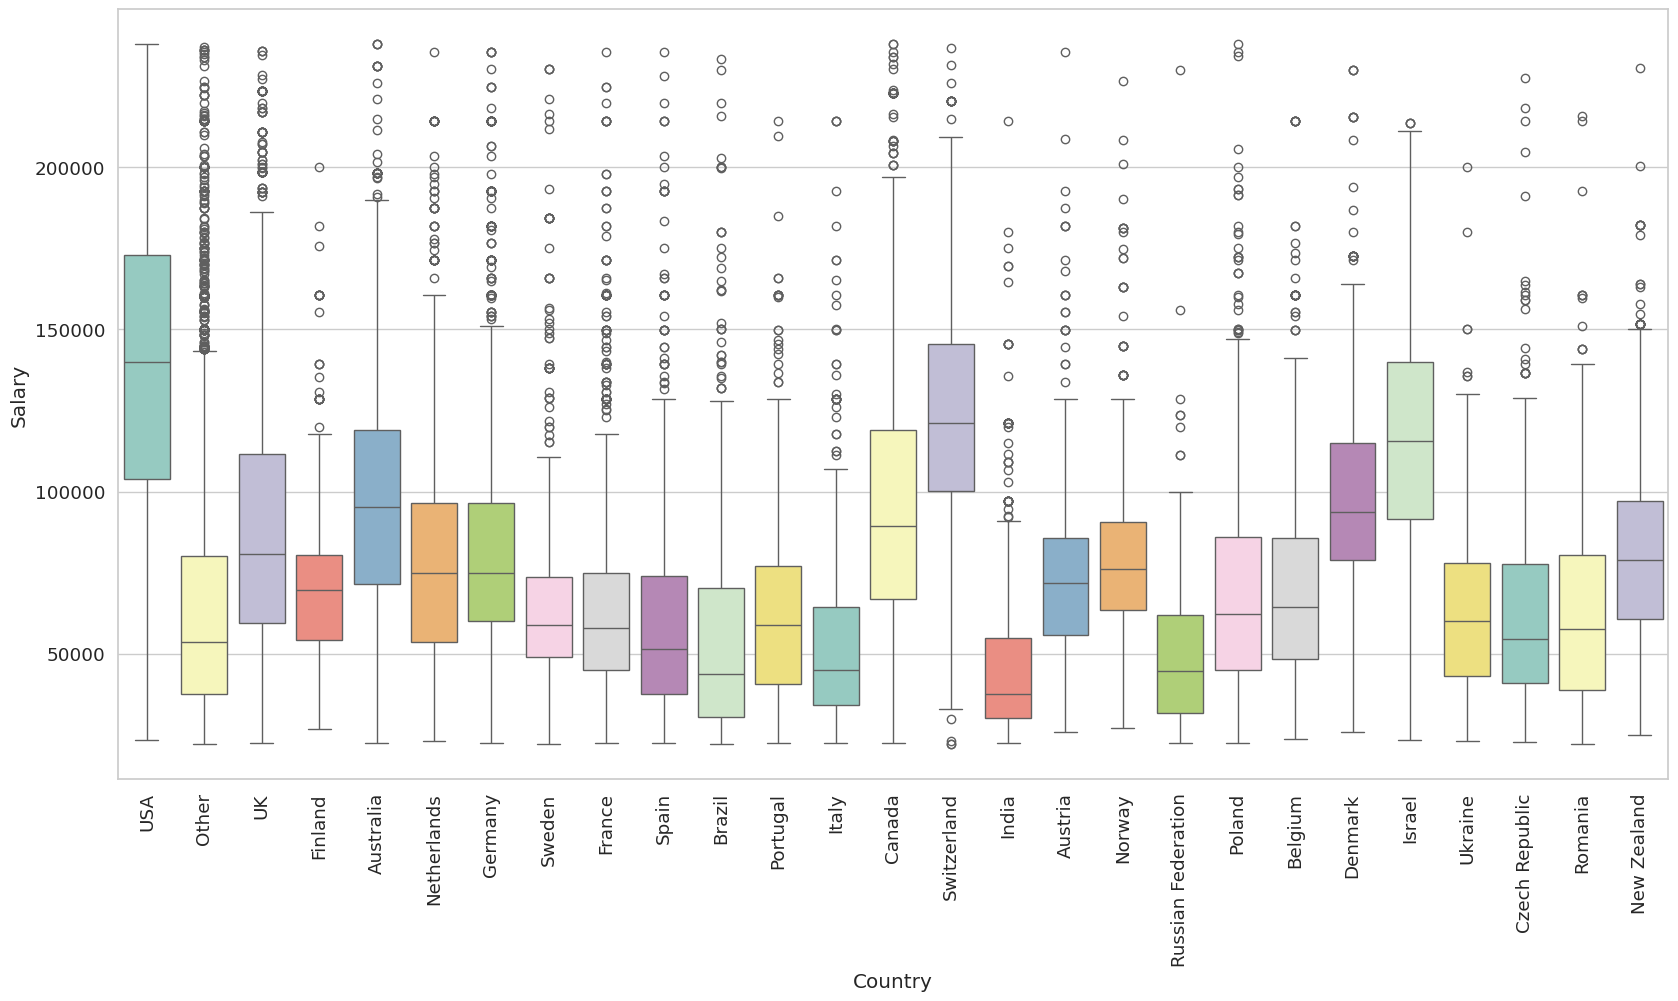

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo bản sao DataFrame và lọc theo điều kiện mức lương
temp_df = df.copy()
temp_df = temp_df[temp_df["Salary"] <= 0.3*1e6]

# Định nghĩa màu cho các hộp
boxplot_palette = sns.color_palette("Set3")  # Có thể chọn bất kỳ bảng màu nào phù hợp

# Vẽ boxplot với palette
plt.figure(figsize=(20, 10))
sns.boxplot(data=temp_df, x="Country", y="Salary", palette=boxplot_palette)
plt.xticks(rotation=90)
plt.show()
